In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from os import replace

In [3]:
import missingno as msno
from sklearn.feature_selection import chi2

In [4]:
df = pd.read_csv('/content/drive/MyDrive/diabetic_data.csv')
df

encounter_id  patient_nbr             race  gender      age weight  \
0            2278392      8222157        Caucasian  Female   [0-10)      ?   
1             149190     55629189        Caucasian  Female  [10-20)      ?   
2              64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3             500364     82442376        Caucasian    Male  [30-40)      ?   
4              16680     42519267        Caucasian    Male  [40-50)      ?   
...              ...          ...              ...     ...      ...    ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)      ?   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)      ?   
101763     443854148     41088789        Caucasian    Male  [70-80)      ?   
101764     443857166     31693671        Caucasian  Female  [80-90)      ?   
101765     443867222    175429310        Caucasian    Male  [70-80)      ?   

        admission_type_id  discharge_disposition_id  admission_source_id  \
0                       6                        25                    1   
1                       1                         1                    7   
2                       1                         1                    7   
3                       1                         1                    7   
4                       1                         1                    7   
...                   ...                       ...                  ...   
101761                  1                         3                    7   
101762                  1                         4                    5   
101763                  1                         1                    7   
101764                  2                         3                    7   
101765                  1                         1                    7   

        time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                      1  ...          No      No                   No   
1                      3  ...          No      Up                   No   
2                      2  ...          No      No                   No   
3                      2  ...          No      Up                   No   
4                      1  ...          No  Steady                   No   
...                  ...  ...         ...     ...                  ...   
101761                 3  ...          No    Down                   No   
101762                 5  ...          No  Steady                   No   
101763                 1  ...          No    Down                   No   
101764                10  ...          No      Up                   No   
101765                 6  ...          No      No                   No   

        glipizide-metformin  glimepiride-pioglitazone  \
0                        No                        No   
1                        No                        No   
2                        No                        No   
3                        No                        No   
4                        No                        No   
...                     ...                       ...   
101761                   No                        No   
101762                   No                        No   
101763                   No                        No   
101764                   No                        No   
101765                   No                        No   

        metformin-rosiglitazone  metformin-pioglitazone  change diabetesMed  \
0                            No                      No      No          No   
1                            No                      No      Ch         Yes   
2                            No                      No      No         Yes   
3                            No                      No      Ch         Yes   
4                            No                      No      Ch         Yes   
...                         ...                     ...     ...         ...   
101761                       No

# Data Cleaning


In [5]:
df.drop(['patient_nbr'], axis=1, inplace=True)
df

encounter_id             race  gender      age weight  \
0            2278392        Caucasian  Female   [0-10)      ?   
1             149190        Caucasian  Female  [10-20)      ?   
2              64410  AfricanAmerican  Female  [20-30)      ?   
3             500364        Caucasian    Male  [30-40)      ?   
4              16680        Caucasian    Male  [40-50)      ?   
...              ...              ...     ...      ...    ...   
101761     443847548  AfricanAmerican    Male  [70-80)      ?   
101762     443847782  AfricanAmerican  Female  [80-90)      ?   
101763     443854148        Caucasian    Male  [70-80)      ?   
101764     443857166        Caucasian  Female  [80-90)      ?   
101765     443867222        Caucasian    Male  [70-80)      ?   

        admission_type_id  discharge_disposition_id  admission_source_id  \
0                       6                        25                    1   
1                       1                         1                    7   
2                       1                         1                    7   
3                       1                         1                    7   
4                       1                         1                    7   
...                   ...                       ...                  ...   
101761                  1                         3                    7   
101762                  1                         4                    5   
101763                  1                         1                    7   
101764                  2                         3                    7   
101765                  1                         1                    7   

        time_in_hospital payer_code  ... citoglipton  insulin  \
0                      1          ?  ...          No       No   
1                      3          ?  ...          No       Up   
2                      2          ?  ...          No       No   
3                      2          ?  ...          No       Up   
4                      1          ?  ...          No   Steady   
...                  ...        ...  ...         ...      ...   
101761                 3         MC  ...          No     Down   
101762                 5         MC  ...          No   Steady   
101763                 1         MC  ...          No     Down   
101764                10         MC  ...          No       Up   
101765                 6          ?  ...          No       No   

        glyburide-metformin  glipizide-metformin  glimepiride-pioglitazone  \
0                        No                   No                        No   
1                        No                   No                        No   
2                        No                   No                        No   
3                        No                   No                        No   
4                        No                   No                        No   
...                     ...                  ...                       ...   
101761                   No                   No                        No   
101762                   No                   No                        No   
101763                   No                   No                        No   
101764                   No                   No                        No   
101765                   No                   No                        No   

        metformin-rosiglitazone  metformin-pioglitazone change diabetesMed  \
0                            No                      No     No          No   
1                            No                      No     Ch         Yes   
2                            No                      No     No         Yes   
3                            No                      No     Ch         Yes   
4                            No                      No     Ch         Yes   
...                         ...                     ...    ...         ...   
101761                       No                   

In [6]:
df.replace('?', np.nan, inplace=True)
df.isnull().sum()

encounter_id                    0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose                        0
miglitol                        0
troglitazone                    0
tolazamide                      0
examide                         0
citoglipton                     0
insulin                         0
glyburide-metformin             0
glipizide-metformin             0
glimepiride-pioglitazone        0
metformin-rosiglitazone         0
metformin-pioglitazone          0
change                          0
diabetesMed                     0
readmitted                      0
dtype: int64

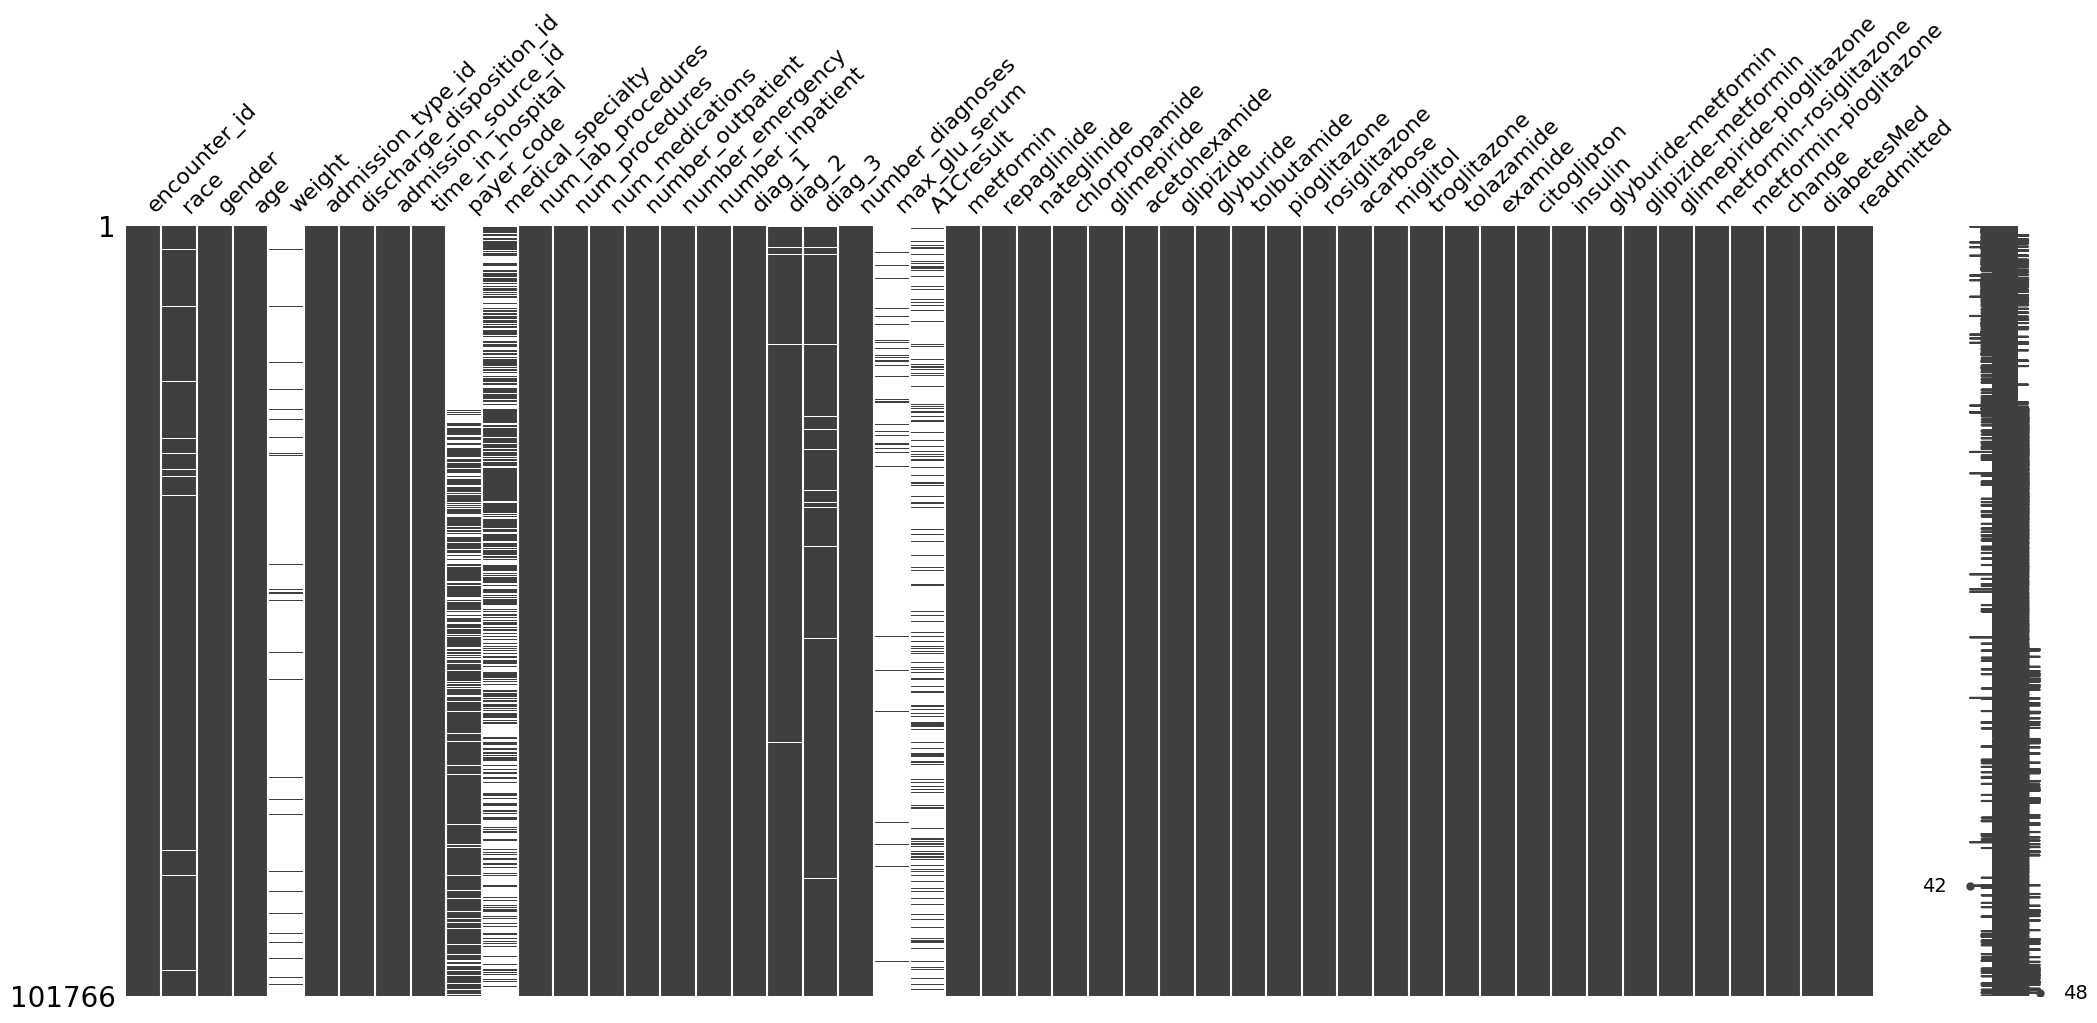

In [7]:
msno.matrix(df)
plt.show()

In [8]:
df1 = df.copy()
df1.drop(['weight','payer_code', 'race','gender'], axis=1, inplace=True)
df1

encounter_id      age  admission_type_id  discharge_disposition_id  \
0            2278392   [0-10)                  6                        25   
1             149190  [10-20)                  1                         1   
2              64410  [20-30)                  1                         1   
3             500364  [30-40)                  1                         1   
4              16680  [40-50)                  1                         1   
...              ...      ...                ...                       ...   
101761     443847548  [70-80)                  1                         3   
101762     443847782  [80-90)                  1                         4   
101763     443854148  [70-80)                  1                         1   
101764     443857166  [80-90)                  2                         3   
101765     443867222  [70-80)                  1                         1   

        admission_source_id  time_in_hospital         medical_specialty  \
0                         1                 1  Pediatrics-Endocrinology   
1                         7                 3                       NaN   
2                         7                 2                       NaN   
3                         7                 2                       NaN   
4                         7                 1                       NaN   
...                     ...               ...                       ...   
101761                    7                 3                       NaN   
101762                    5                 5                       NaN   
101763                    7                 1                       NaN   
101764                    7                10           Surgery-General   
101765                    7                 6                       NaN   

        num_lab_procedures  num_procedures  num_medications  ...  citoglipton  \
0                       41               0                1  ...           No   
1                       59               0               18  ...           No   
2                       11               5               13  ...           No   
3                       44               1               16  ...           No   
4                       51               0                8  ...           No   
...                    ...             ...              ...  ...          ...   
101761                  51               0               16  ...           No   
101762                  33               3               18  ...           No   
101763                  53               0                9  ...           No   
101764                  45               2               21  ...           No   
101765                  13               3                3  ...           No   

        insulin  glyburide-metformin glipizide-metformin  \
0            No                   No                  No   
1            Up                   No                  No   
2            No                   No                  No   
3            Up                   No                  No   
4        Steady                   No                  No   
...         ...                  ...                 ...   
101761     Down                   No                  No   
101762   Steady                   No                  No   
101763     Down                   No                  No   
101764       Up                   No                  No   
101765       No                   No                  No   

       glimepiride-pioglitazone metformin-rosiglitazone  \
0                            No                      No   
1                            No                      No   
2                            No                      No   
3                            No                      No   
4                            No                      No   
...                         ...                     ...   
101761                       No                      No   
1017

In [9]:
df1['medical_specialty'] = df1['medical_specialty'].replace(np.nan, 'Unknown')
df1['A1Cresult'] = df1['A1Cresult'].replace(np.nan, 'None')
df1['max_glu_serum'] = df1['max_glu_serum'].replace(np.nan, 'None')
df1['diag_2'] = df1['diag_2'].replace(np.nan,'None')
df1['diag_3'] = df1['diag_3'].replace(np.nan,'None')
df1 = df1.dropna(subset=['diag_1'])
df1.isnull().sum()

encounter_id                0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide                     0
citoglipton                 0
insulin                     0
glyburide-metformin         0
glipizide-metformin         0
glimepiride-pioglitazone    0
metformin-rosiglitazone     0
metformin-pioglitazone      0
change                      0
diabetesMed                 0
readmitted                  0
dtype: int64

# Data Preprocessing

In [10]:
df1['age'].value_counts()

age
[70-80)     26064
[60-70)     22476
[50-60)     17254
[80-90)     17192
[40-50)      9683
[30-40)      3775
[90-100)     2793
[20-30)      1656
[10-20)       691
[0-10)        161
Name: count, dtype: int64

In [11]:
def age_group(age):
  if age == '[0-10)':
    return int(5)
  elif age == '[10-20)':
    return int(15)
  elif age == '[20-30)':
    return int(25)
  elif age == '[30-40)':
    return int(35)
  elif age == '[40-50)':
    return int(45)
  elif age == '[50-60)':
    return int(55)
  elif age == '[60-70)':
    return int(65)
  elif age == '[70-80)':
    return int(75)
  elif age == '[80-90)':
    return int(85)
  elif age == '[90-100)':
    return int(95)

df1['age'] = df1['age'].apply(age_group)
df1

/tmp/ipython-input-3292216210.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['age'] = df1['age'].apply(age_group)


encounter_id  age  admission_type_id  discharge_disposition_id  \
0            2278392    5                  6                        25   
1             149190   15                  1                         1   
2              64410   25                  1                         1   
3             500364   35                  1                         1   
4              16680   45                  1                         1   
...              ...  ...                ...                       ...   
101761     443847548   75                  1                         3   
101762     443847782   85                  1                         4   
101763     443854148   75                  1                         1   
101764     443857166   85                  2                         3   
101765     443867222   75                  1                         1   

        admission_source_id  time_in_hospital         medical_specialty  \
0                         1                 1  Pediatrics-Endocrinology   
1                         7                 3                   Unknown   
2                         7                 2                   Unknown   
3                         7                 2                   Unknown   
4                         7                 1                   Unknown   
...                     ...               ...                       ...   
101761                    7                 3                   Unknown   
101762                    5                 5                   Unknown   
101763                    7                 1                   Unknown   
101764                    7                10           Surgery-General   
101765                    7                 6                   Unknown   

        num_lab_procedures  num_procedures  num_medications  ...  citoglipton  \
0                       41               0                1  ...           No   
1                       59               0               18  ...           No   
2                       11               5               13  ...           No   
3                       44               1               16  ...           No   
4                       51               0                8  ...           No   
...                    ...             ...              ...  ...          ...   
101761                  51               0               16  ...           No   
101762                  33               3               18  ...           No   
101763                  53               0                9  ...           No   
101764                  45               2               21  ...           No   
101765                  13               3                3  ...           No   

        insulin  glyburide-metformin glipizide-metformin  \
0            No                   No                  No   
1            Up                   No                  No   
2            No                   No                  No   
3            Up                   No                  No   
4        Steady                   No                  No   
...         ...                  ...                 ...   
101761     Down                   No                  No   
101762   Steady                   No                  No   
101763     Down                   No                  No   
101764       Up                   No                  No   
101765       No                   No                  No   

       glimepiride-pioglitazone metformin-rosiglitazone  \
0                            No                      No   
1                            No                      No   
2                            No                      No   
3                            No                      No   
4                            No                      No   
...                         ...                     ...   
101761                       No                      No   
101762                       No                     

In [12]:
df1['admission_type_id'].value_counts()

admission_type_id
1    53979
3    18862
2    18478
6     5290
5     4785
8      320
7       21
4       10
Name: count, dtype: int64

In [13]:
df1['admission_type_id'] = df1['admission_type_id'].replace({5: 6, 8: 6})

def admission_type(x):
    if x == 1:
        return "Emergency"
    elif x == 2:
        return "Urgent"
    elif x == 3:
        return "Elective"
    elif x == 4:
        return "Newborn"
    else:
        return "Other/Unknown"


df1['admission_type_id'] = df1['admission_type_id'].apply(admission_type)
df1

/tmp/ipython-input-606490537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['admission_type_id'] = df1['admission_type_id'].replace({5: 6, 8: 6})
/tmp/ipython-input-606490537.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['admission_type_id'] = df1['admission_type_id'].apply(admission_type)


encounter_id  age admission_type_id  discharge_disposition_id  \
0            2278392    5     Other/Unknown                        25   
1             149190   15         Emergency                         1   
2              64410   25         Emergency                         1   
3             500364   35         Emergency                         1   
4              16680   45         Emergency                         1   
...              ...  ...               ...                       ...   
101761     443847548   75         Emergency                         3   
101762     443847782   85         Emergency                         4   
101763     443854148   75         Emergency                         1   
101764     443857166   85            Urgent                         3   
101765     443867222   75         Emergency                         1   

        admission_source_id  time_in_hospital         medical_specialty  \
0                         1                 1  Pediatrics-Endocrinology   
1                         7                 3                   Unknown   
2                         7                 2                   Unknown   
3                         7                 2                   Unknown   
4                         7                 1                   Unknown   
...                     ...               ...                       ...   
101761                    7                 3                   Unknown   
101762                    5                 5                   Unknown   
101763                    7                 1                   Unknown   
101764                    7                10           Surgery-General   
101765                    7                 6                   Unknown   

        num_lab_procedures  num_procedures  num_medications  ...  citoglipton  \
0                       41               0                1  ...           No   
1                       59               0               18  ...           No   
2                       11               5               13  ...           No   
3                       44               1               16  ...           No   
4                       51               0                8  ...           No   
...                    ...             ...              ...  ...          ...   
101761                  51               0               16  ...           No   
101762                  33               3               18  ...           No   
101763                  53               0                9  ...           No   
101764                  45               2               21  ...           No   
101765                  13               3                3  ...           No   

        insulin  glyburide-metformin glipizide-metformin  \
0            No                   No                  No   
1            Up                   No                  No   
2            No                   No                  No   
3            Up                   No                  No   
4        Steady                   No                  No   
...         ...                  ...                 ...   
101761     Down                   No                  No   
101762   Steady                   No                  No   
101763     Down                   No                  No   
101764       Up                   No                  No   
101765       No                   No                  No   

       glimepiride-pioglitazone metformin-rosiglitazone  \
0                            No                      No   
1                            No                      No   
2                            No                      No   
3                            No                      No   
4                            No                      No   
...                         ...                     ...   
101761                       No                      No   
101762                       No                      No   
10176

In [14]:
df1['admission_type_id'].value_counts()

admission_type_id
Emergency        53979
Elective         18862
Urgent           18478
Other/Unknown    10416
Newborn             10
Name: count, dtype: int64

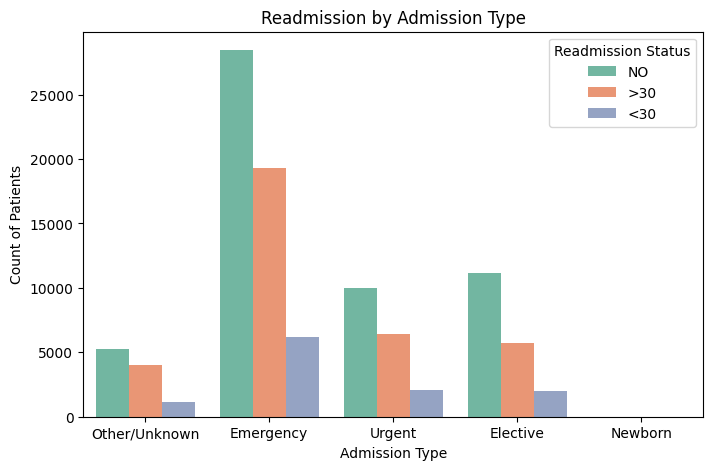

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(data=df1, x='admission_type_id', hue='readmitted', palette='Set2')

plt.title('Readmission by Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Count of Patients')
plt.legend(title='Readmission Status')
plt.show()

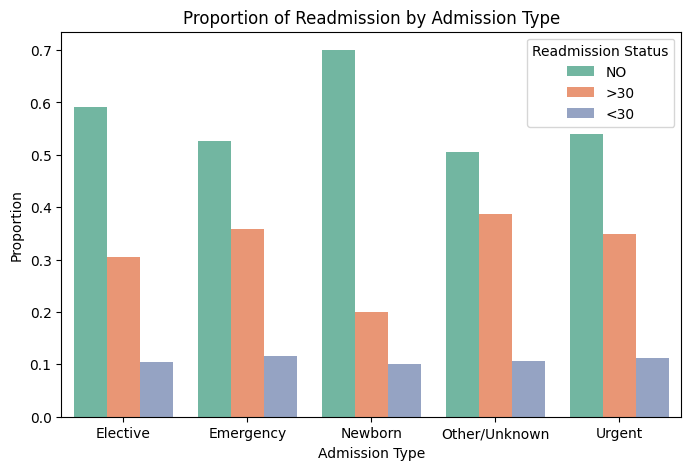

In [16]:
# Calculate proportions
prop = (df1.groupby('admission_type_id')['readmitted']
          .value_counts(normalize=True)
          .rename('proportion')
          .reset_index())

# Plot normalized bar chart
plt.figure(figsize=(8,5))
sns.barplot(data=prop, x='admission_type_id', y='proportion', hue='readmitted', palette='Set2')
plt.title('Proportion of Readmission by Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Proportion')
plt.legend(title='Readmission Status')
plt.show()

In [17]:
df1['admission_type_id'].value_counts()

admission_type_id
Emergency        53979
Elective         18862
Urgent           18478
Other/Unknown    10416
Newborn             10
Name: count, dtype: int64

In [18]:
df1['discharge_disposition_id'] = df1['discharge_disposition_id'].replace({18: 26, 25: 26, 30: 26})
discharge_disposition_map = {
    1: 'Home',
    2: 'Short-term hospital',
    3: 'SNF',
    4: 'ICF',
    5: 'Inpatient care',
    6: 'Home health',
    7: 'Left AMA',
    8: 'Home IV provider',
    9: 'Readmitted same hospital',
    10: 'Neonate aftercare',
    11: 'Expired',
    12: 'Still patient',
    13: 'Hospice home',
    14: 'Hospice facility',
    15: 'Swing bed',
    16: 'Outpatient other institution',
    17: 'Outpatient same institution',
    19: 'Expired home',
    20: 'Expired facility',
    21: 'Expired unknown',
    22: 'Rehab facility',
    23: 'Long-term hospital',
    24: 'Medicaid-only nursing',
    26: 'Unknown'
}
df1['discharge_disposition_id'] = df1['discharge_disposition_id'].map(discharge_disposition_map)

df1['discharge_disposition_id'].value_counts()

/tmp/ipython-input-102140111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['discharge_disposition_id'] = df1['discharge_disposition_id'].replace({18: 26, 25: 26, 30: 26})
/tmp/ipython-input-102140111.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['discharge_disposition_id'] = df1['discharge_disposition_id'].map(discharge_disposition_map)


discharge_disposition_id
Home                            60228
SNF                             13950
Home health                     12898
Unknown                          4678
Short-term hospital              2127
Rehab facility                   1993
Expired                          1642
Inpatient care                   1182
ICF                               815
Left AMA                          622
Long-term hospital                412
Hospice home                      398
Hospice facility                  372
Home IV provider                  108
Swing bed                          63
Medicaid-only nursing              48
Readmitted same hospital           21
Outpatient same institution        14
Outpatient other institution       11
Expired home                        8
Neonate aftercare                   6
Still patient                       3
Expired facility                    2
Name: count, dtype: int64

In [19]:
df1['admission_source_id'] = df1['admission_source_id'].replace({9: 17, 15: 17, 20: 17, 21: 17})
admission_source_id = { 1 : 'Physician Referral'
, 2 : 'Clinic Referral'
, 3 : 'HMO Referral'
, 4 : 'Transfer from a hospital'
, 5 : 'Transfer from a Skilled Nursing Facility (SNF)'
, 6 : 'Transfer from another health care facility'
, 7 : 'Emergency Room'
, 8 : 'Court/Law Enforcement'
, 10 : 'Transfer from critial access hospital'
, 11 : 'Normal Delivery'
, 12 : 'Premature Delivery'
, 13 : 'Sick Baby'
, 14 : 'Extramural Birth'
, 17 : 'NULL'
, 18 : 'Transfer From Another Home Health Agency'
, 19 : 'Readmission to Same Home Health Agency'
, 20 : 'Not Mapped'
, 22 : 'Transfer from hospital inpt/same fac reslt in a sep claim'
, 23 : 'Born inside this hospital'
, 24 : 'Born outside this hospital'
, 25 : 'Transfer from Ambulatory Surgery Center'
, 26 : 'Transfer from Hospice'
                      }
df1['admission_source_id'] = df1['admission_source_id'].map(admission_source_id)

df1['admission_source_id'].value_counts()

/tmp/ipython-input-25934793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['admission_source_id'] = df1['admission_source_id'].replace({9: 17, 15: 17, 20: 17, 21: 17})
/tmp/ipython-input-25934793.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['admission_source_id'] = df1['admission_source_id'].map(admission_source_id)


admission_source_id
Emergency Room                                               57486
Physician Referral                                           29555
NULL                                                          7066
Transfer from a hospital                                      3186
Transfer from another health care facility                    2264
Clinic Referral                                               1104
Transfer from a Skilled Nursing Facility (SNF)                 854
HMO Referral                                                   187
Court/Law Enforcement                                           16
Transfer from hospital inpt/same fac reslt in a sep claim       12
Transfer from critial access hospital                            8
Extramural Birth                                                 2
Normal Delivery                                                  2
Transfer from Ambulatory Surgery Center                          2
Sick Baby                                                        1
Name: count, dtype: int64

In [20]:
df1['diag_1'] = df1['diag_1'].astype(str).str[ :3]
df1['diag_2'] = df1['diag_2'].astype(str).str[ :3]
df1['diag_3'] = df1['diag_3'].astype(str).str[ :3]

df1

/tmp/ipython-input-13398950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['diag_1'] = df1['diag_1'].astype(str).str[ :3]
/tmp/ipython-input-13398950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['diag_2'] = df1['diag_2'].astype(str).str[ :3]
/tmp/ipython-input-13398950.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

encounter_id  age admission_type_id discharge_disposition_id  \
0            2278392    5     Other/Unknown                  Unknown   
1             149190   15         Emergency                     Home   
2              64410   25         Emergency                     Home   
3             500364   35         Emergency                     Home   
4              16680   45         Emergency                     Home   
...              ...  ...               ...                      ...   
101761     443847548   75         Emergency                      SNF   
101762     443847782   85         Emergency                      ICF   
101763     443854148   75         Emergency                     Home   
101764     443857166   85            Urgent                      SNF   
101765     443867222   75         Emergency                     Home   

                                   admission_source_id  time_in_hospital  \
0                                   Physician Referral                 1   
1                                       Emergency Room                 3   
2                                       Emergency Room                 2   
3                                       Emergency Room                 2   
4                                       Emergency Room                 1   
...                                                ...               ...   
101761                                  Emergency Room                 3   
101762  Transfer from a Skilled Nursing Facility (SNF)                 5   
101763                                  Emergency Room                 1   
101764                                  Emergency Room                10   
101765                                  Emergency Room                 6   

               medical_specialty  num_lab_procedures  num_procedures  \
0       Pediatrics-Endocrinology                  41               0   
1                        Unknown                  59               0   
2                        Unknown                  11               5   
3                        Unknown                  44               1   
4                        Unknown                  51               0   
...                          ...                 ...             ...   
101761                   Unknown                  51               0   
101762                   Unknown                  33               3   
101763                   Unknown                  53               0   
101764           Surgery-General                  45               2   
101765                   Unknown                  13               3   

        num_medications  ...  citoglipton  insulin  glyburide-metformin  \
0                     1  ...           No       No                   No   
1                    18  ...           No       Up                   No   
2                    13  ...           No       No                   No   
3                    16  ...           No       Up                   No   
4                     8  ...           No   Steady                   No   
...                 ...  ...          ...      ...                  ...   
101761               16  ...           No     Down                   No   
101762               18  ...           No   Steady                   No   
101763                9  ...           No     Down                   No   
101764               21  ...           No       Up                   No   
101765                3  ...           No       No                   No   

       glipizide-metformin glimepiride-pioglitazone metformin-rosiglitazone  \
0                       No                       No                      No   
1                       No                       No                      No   
2                       No                       No                      No   
3                       No                       No                      No   
4                       No                       No                  

In [21]:
def map_diag_to_category(code):
    if pd.isna(code):
        return 'Unknown'
    code_str = str(code)
    try:
        if code_str.startswith('V'):
            return 'Supplementary'
        elif code_str.startswith('E'):
            return 'External Causes'
        num = float(code_str)
        if 1 <= num <= 139:
            return 'Infectious'
        elif 140 <= num <= 239:
            return 'Cancer'
        elif 240 <= num <= 279:
            return 'Endocrine'
        elif 280 <= num <= 289:
            return 'Blood'
        elif 290 <= num <= 319:
            return 'Mental'
        elif 320 <= num <= 389:
            return 'Nervous'
        elif 390 <= num <= 459:
            return 'Circulatory'
        elif 460 <= num <= 519:
            return 'Respiratory'
        elif 520 <= num <= 579:
            return 'Digestive'
        elif 580 <= num <= 629:
            return 'Genitourinary'
        elif 680 <= num <= 709:
            return 'Skin'
        elif 710 <= num <= 739:
            return 'Musculoskeletal'
        elif 740 <= num <= 759:
            return 'Congenital'
        elif 780 <= num <= 799:
            return 'Symptoms'
        elif 800 <= num <= 999:
            return 'Injury'
        else:
            return 'Other'
    except:
        return 'Unknown'

for col in ['diag_1', 'diag_2', 'diag_3']:
    df1[col] = df1[col].apply(map_diag_to_category)

df1

/tmp/ipython-input-2409362067.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1[col].apply(map_diag_to_category)


encounter_id  age admission_type_id discharge_disposition_id  \
0            2278392    5     Other/Unknown                  Unknown   
1             149190   15         Emergency                     Home   
2              64410   25         Emergency                     Home   
3             500364   35         Emergency                     Home   
4              16680   45         Emergency                     Home   
...              ...  ...               ...                      ...   
101761     443847548   75         Emergency                      SNF   
101762     443847782   85         Emergency                      ICF   
101763     443854148   75         Emergency                     Home   
101764     443857166   85            Urgent                      SNF   
101765     443867222   75         Emergency                     Home   

                                   admission_source_id  time_in_hospital  \
0                                   Physician Referral                 1   
1                                       Emergency Room                 3   
2                                       Emergency Room                 2   
3                                       Emergency Room                 2   
4                                       Emergency Room                 1   
...                                                ...               ...   
101761                                  Emergency Room                 3   
101762  Transfer from a Skilled Nursing Facility (SNF)                 5   
101763                                  Emergency Room                 1   
101764                                  Emergency Room                10   
101765                                  Emergency Room                 6   

               medical_specialty  num_lab_procedures  num_procedures  \
0       Pediatrics-Endocrinology                  41               0   
1                        Unknown                  59               0   
2                        Unknown                  11               5   
3                        Unknown                  44               1   
4                        Unknown                  51               0   
...                          ...                 ...             ...   
101761                   Unknown                  51               0   
101762                   Unknown                  33               3   
101763                   Unknown                  53               0   
101764           Surgery-General                  45               2   
101765                   Unknown                  13               3   

        num_medications  ...  citoglipton  insulin  glyburide-metformin  \
0                     1  ...           No       No                   No   
1                    18  ...           No       Up                   No   
2                    13  ...           No       No                   No   
3                    16  ...           No       Up                   No   
4                     8  ...           No   Steady                   No   
...                 ...  ...          ...      ...                  ...   
101761               16  ...           No     Down                   No   
101762               18  ...           No   Steady                   No   
101763                9  ...           No     Down                   No   
101764               21  ...           No       Up                   No   
101765                3  ...           No       No                   No   

       glipizide-metformin glimepiride-pioglitazone metformin-rosiglitazone  \
0                       No                       No                      No   
1                       No                       No                      No   
2                       No                       No                      No   
3                       No                       No                      No   
4                       No                       No                  

In [22]:
df1

encounter_id  age admission_type_id discharge_disposition_id  \
0            2278392    5     Other/Unknown                  Unknown   
1             149190   15         Emergency                     Home   
2              64410   25         Emergency                     Home   
3             500364   35         Emergency                     Home   
4              16680   45         Emergency                     Home   
...              ...  ...               ...                      ...   
101761     443847548   75         Emergency                      SNF   
101762     443847782   85         Emergency                      ICF   
101763     443854148   75         Emergency                     Home   
101764     443857166   85            Urgent                      SNF   
101765     443867222   75         Emergency                     Home   

                                   admission_source_id  time_in_hospital  \
0                                   Physician Referral                 1   
1                                       Emergency Room                 3   
2                                       Emergency Room                 2   
3                                       Emergency Room                 2   
4                                       Emergency Room                 1   
...                                                ...               ...   
101761                                  Emergency Room                 3   
101762  Transfer from a Skilled Nursing Facility (SNF)                 5   
101763                                  Emergency Room                 1   
101764                                  Emergency Room                10   
101765                                  Emergency Room                 6   

               medical_specialty  num_lab_procedures  num_procedures  \
0       Pediatrics-Endocrinology                  41               0   
1                        Unknown                  59               0   
2                        Unknown                  11               5   
3                        Unknown                  44               1   
4                        Unknown                  51               0   
...                          ...                 ...             ...   
101761                   Unknown                  51               0   
101762                   Unknown                  33               3   
101763                   Unknown                  53               0   
101764           Surgery-General                  45               2   
101765                   Unknown                  13               3   

        num_medications  ...  citoglipton  insulin  glyburide-metformin  \
0                     1  ...           No       No                   No   
1                    18  ...           No       Up                   No   
2                    13  ...           No       No                   No   
3                    16  ...           No       Up                   No   
4                     8  ...           No   Steady                   No   
...                 ...  ...          ...      ...                  ...   
101761               16  ...           No     Down                   No   
101762               18  ...           No   Steady                   No   
101763                9  ...           No     Down                   No   
101764               21  ...           No       Up                   No   
101765                3  ...           No       No                   No   

       glipizide-metformin glimepiride-pioglitazone metformin-rosiglitazone  \
0                       No                       No                      No   
1                       No                       No                      No   
2                       No                       No                      No   
3                       No                       No                      No   
4                       No                       No                  

# Feature Engineering

In [23]:
def simplify_discharge(x):

    home = [
        'Home', 'Home health', 'Home IV provider'
    ]

    short_term_hospital = [
        'Short-term hospital', 'Inpatient care'
    ]

    post_acute = [
        'SNF', 'ICF', 'Rehab facility', 'Swing bed'
    ]

    long_term = [
        'Long-term hospital', 'Medicaid-only nursing'
    ]

    hospice = [
        'Hospice home', 'Hospice facility'
    ]

    expired = [
        'Expired', 'Expired home', 'Expired facility', 'Expired unknown'
    ]

    still_patient = [
        'Still patient', 'Readmitted same hospital'
    ]

    left_ama = ['Left AMA']


    if x in home:
        return 'Home'
    elif x in short_term_hospital:
        return 'Short-Term Hospital Transfer'
    elif x in post_acute:
        return 'Post-Acute Care'
    elif x in long_term:
        return 'Long-Term Care Facility'
    elif x in hospice:
        return 'Hospice'
    elif x in expired:
        return 'Expired'
    elif x in left_ama:
        return 'Left AMA'
    elif x in still_patient:
        return 'Still In Care'
    else:
        return 'Other/Unknown'


df1['discharge_disposition_id'] = df1['discharge_disposition_id'].apply(simplify_discharge)

/tmp/ipython-input-2398496261.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['discharge_disposition_id'] = df1['discharge_disposition_id'].apply(simplify_discharge)


In [24]:
df1['discharge_disposition_id'].value_counts()

discharge_disposition_id
Home                            73234
Post-Acute Care                 16821
Other/Unknown                    4853
Short-Term Hospital Transfer     3309
Expired                          1652
Hospice                           770
Left AMA                          622
Long-Term Care Facility           460
Still In Care                      24
Name: count, dtype: int64

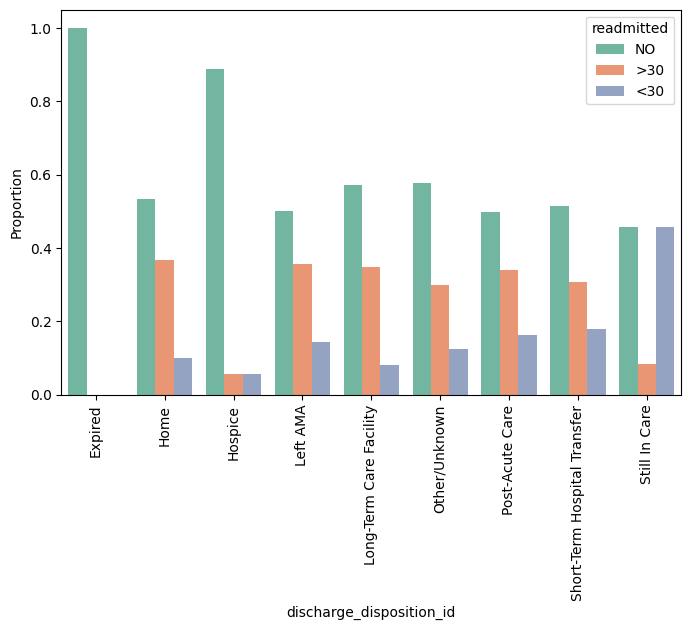

In [25]:
# Calculate proportions
prop = (df1.groupby('discharge_disposition_id')['readmitted']
          .value_counts(normalize=True)
          .rename('proportion')
          .reset_index())

# Plot normalized bar chart
plt.figure(figsize=(8,5))
sns.barplot(data=prop, x='discharge_disposition_id', y='proportion', hue='readmitted', palette='Set2')
plt.xticks(rotation=90)
plt.ylabel('Proportion')
plt.show()

In [26]:
def simplify_admission_source(x):
    x = str(x).strip()

    referral_sources = [
        'Physician Referral', 'Clinic Referral', 'HMO Referral',
        'Physician/Clinic Referral'
    ]

    emergency_sources = [
        'Emergency Room', 'ER', 'Accident & Emergency'
    ]

    inpatient_transfers = [
        'Transfer from a hospital',
        'Transfer from critial access hospital',
        'Transfer from Hospice',
        'Transfer from hospital inpt/same fac reslt in a sep claim',
        'Transfer from Ambulatory Surgery Center'
    ]

    post_acute_transfers = [
        'Transfer from SNF',
        'Transfer from another health care facility',
        'Transfer From Another Home Health Agency',
        'Readmission to Same Home Health Agency',
    ]

    obstetric_birth = [
        'Normal Delivery', 'Premature Delivery', 'Sick Baby',
        'Extramural Birth', 'Born inside this hospital',
        'Born outside this hospital'
    ]

    law_enforcement = [
        'Court/Law Enforcement', 'Legal Interventions'
    ]

    self_or_walkin = [
        'Self Referral', 'Walk-in', 'Community Referral', 'Self'
    ]

    if x in referral_sources:
        return 'Referral'
    elif x in emergency_sources:
        return 'Emergency'
    elif x in inpatient_transfers:
        return 'Transfer (Hospital)'
    elif x in post_acute_transfers:
        return 'Transfer (Post-Acute)'
    elif x in obstetric_birth:
        return 'Obstetric/Newborn'
    elif x in law_enforcement:
        return 'Law Enforcement'
    elif x in self_or_walkin:
        return 'Self/Walk-in'
    else:
        return 'Other/Unknown'


df1['admission_source_id'] = df1['admission_source_id'].apply(simplify_admission_source)
df1['admission_source_id'].value_counts()

/tmp/ipython-input-3934291543.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['admission_source_id'] = df1['admission_source_id'].apply(simplify_admission_source)


admission_source_id
Emergency                57486
Referral                 30846
Other/Unknown             7920
Transfer (Hospital)       3208
Transfer (Post-Acute)     2264
Law Enforcement             16
Obstetric/Newborn            5
Name: count, dtype: int64

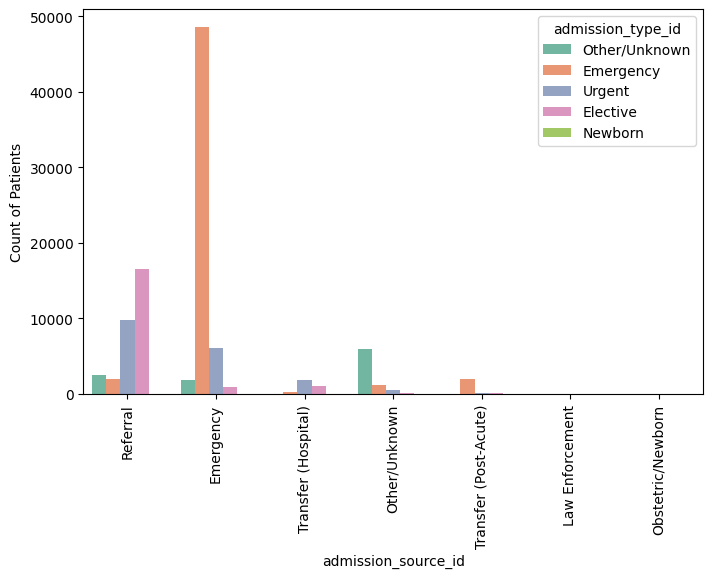

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(data=df1, x='admission_source_id', hue='admission_type_id', palette='Set2')

plt.xticks(rotation=90)
plt.ylabel('Count of Patients')
plt.show()

In [28]:
df1.head()

encounter_id  age admission_type_id discharge_disposition_id  \
0       2278392    5     Other/Unknown            Other/Unknown   
1        149190   15         Emergency                     Home   
2         64410   25         Emergency                     Home   
3        500364   35         Emergency                     Home   
4         16680   45         Emergency                     Home   

  admission_source_id  time_in_hospital         medical_specialty  \
0            Referral                 1  Pediatrics-Endocrinology   
1           Emergency                 3                   Unknown   
2           Emergency                 2                   Unknown   
3           Emergency                 2                   Unknown   
4           Emergency                 1                   Unknown   

   num_lab_procedures  num_procedures  num_medications  ...  citoglipton  \
0                  41               0                1  ...           No   
1                  59               0               18  ...           No   
2                  11               5               13  ...           No   
3                  44               1               16  ...           No   
4                  51               0                8  ...           No   

   insulin  glyburide-metformin glipizide-metformin glimepiride-pioglitazone  \
0       No                   No                  No                       No   
1       Up                   No                  No                       No   
2       No                   No                  No                       No   
3       Up                   No                  No                       No   
4   Steady                   No                  No                       No   

  metformin-rosiglitazone  metformin-pioglitazone change diabetesMed  \
0                      No                      No     No          No   
1                      No                      No     Ch         Yes   
2                      No                      No     No         Yes   
3                      No                      No     Ch         Yes   
4                      No                      No     Ch         Yes   

  readmitted  
0         NO  
1        >30  
2         NO  
3         NO  
4         NO  

[5 rows x 45 columns]

In [29]:
unique_vals = df1['medical_specialty'].unique()
print(unique_vals)

['Pediatrics-Endocrinology' 'Unknown' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 'Surgery-Neuro' 'Obsterics&Gynecology-GynecologicOnco'
 'ObstetricsandGynecology' 'Pediatrics' 'Hematology/Oncology'
 'Otolaryngology' 'Surgery-Colon&Rectal' 'Pediatrics-CriticalCare'
 'Endocrinology' 'Urology' 'Psychiatry-Child/Adolescent'
 'Pediatrics-Pulmonology' 'Neurology' 'Anesthesiology-Pediatric'
 'Radiology' 'Pediatrics-Hematology-Oncology' 'Psychology' 'Podiatry'
 'Gynecology' 'Oncology' 'Pediatrics-Neurology' 'Surgery-Plastic'
 'Surgery-Thoracic' 'Surgery-PlasticwithinHeadandNeck' 'Ophthalmology'
 'Surgery-Pediatric' 'Pediatrics-EmergencyMedicine'
 'PhysicalMedicineandRehabilitation' 'InfectiousDiseases' 'Anesthesiology'
 'Rheumatology' 'AllergyandImmunology' 'Surgery-Maxillofacial'
 'Pediatrics-InfectiousDi

In [30]:
def categorize_specialty(val):
    internal = ['InternalMedicine','Family/GeneralPractice','Hospitalist','Resident','DCPTEAM','OutreachServices']
    endo = ['Endocrinology','Endocrinology-Metabolism','Pediatrics-Endocrinology']
    cardio = ['Cardiology','Cardiology-Pediatric','Surgery-Cardiovascular','Surgery-Cardiovascular/Thoracic','Surgery-Vascular']
    surgery = ['Surgery-General','Surgery-Neuro','Surgery-Thoracic','Surgery-Colon&Rectal','Surgery-Plastic',
               'Surgery-PlasticwithinHeadandNeck','Surgery-Pediatric','Surgery-Maxillofacial',
               'SurgicalSpecialty','Surgeon','Proctology','Orthopedics','Orthopedics-Reconstructive','Urology']
    peds = ['Pediatrics','Pediatrics-CriticalCare','Pediatrics-EmergencyMedicine','Pediatrics-Pulmonology',
            'Pediatrics-Neurology','Pediatrics-InfectiousDiseases','Pediatrics-AllergyandImmunology',
            'Pediatrics-Hematology-Oncology']
    obgyn = ['ObstetricsandGynecology','Obstetrics','Gynecology','Obsterics&Gynecology-GynecologicOnco','Perinatology']
    specialist = ['Gastroenterology','Pulmonology','Nephrology','Neurology','Rheumatology','InfectiousDiseases',
                  'Dermatology','AllergyandImmunology','SportsMedicine','Otolaryngology','Ophthalmology']
    oncology = ['Oncology','Hematology','Hematology/Oncology','Pediatrics-Hematology-Oncology']
    psych = ['Psychiatry','Psychiatry-Child/Adolescent','Psychiatry-Addictive','Psychology','Neurophysiology']
    emergency = ['Emergency/Trauma','CriticalCare','PhysicianNotFound']
    rehab = ['PhysicalMedicineandRehabilitation','Podiatry','Speech']
    diagnostics = ['Radiology','Radiologist','Pathology','Anesthesiology','Anesthesiology-Pediatric']
    dental_misc = ['Dentistry','Osteopath']
    unknown = ['Unknown']

    if val in internal: return 'InternalMedicine'
    elif val in endo: return 'Endocrinology'
    elif val in cardio: return 'Cardiology'
    elif val in surgery: return 'Surgery'
    elif val in peds: return 'Pediatrics'
    elif val in obgyn: return 'OBGYN'
    elif val in specialist: return 'SpecialistMedicine'
    elif val in oncology: return 'Oncology/Hematology'
    elif val in psych: return 'Psychiatry/Psychology'
    elif val in emergency: return 'Emergency/CriticalCare'
    elif val in rehab: return 'Rehabilitation'
    elif val in diagnostics: return 'Diagnostics/Anesthesia'
    elif val in dental_misc: return 'Dental/Misc'
    elif val in unknown: return 'Unknown'
    else: return 'Other'

df1['medical_specialty'] = df1['medical_specialty'].apply(categorize_specialty)

df1['medical_specialty'].value_counts()

/tmp/ipython-input-2383199873.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['medical_specialty'] = df1['medical_specialty'].apply(categorize_specialty)


medical_specialty
Unknown                   49941
InternalMedicine          22148
Emergency/CriticalCare     7575
Surgery                    7139
Cardiology                 6642
SpecialistMedicine         3476
Diagnostics/Anesthesia     1241
Psychiatry/Psychology       964
OBGYN                       774
Oncology/Hematology         636
Rehabilitation              492
Pediatrics                  387
Endocrinology               287
Dental/Misc                  43
Name: count, dtype: int64

In [31]:
df1.head()

encounter_id  age admission_type_id discharge_disposition_id  \
0       2278392    5     Other/Unknown            Other/Unknown   
1        149190   15         Emergency                     Home   
2         64410   25         Emergency                     Home   
3        500364   35         Emergency                     Home   
4         16680   45         Emergency                     Home   

  admission_source_id  time_in_hospital medical_specialty  num_lab_procedures  \
0            Referral                 1     Endocrinology                  41   
1           Emergency                 3           Unknown                  59   
2           Emergency                 2           Unknown                  11   
3           Emergency                 2           Unknown                  44   
4           Emergency                 1           Unknown                  51   

   num_procedures  num_medications  ...  citoglipton  insulin  \
0               0                1  ...           No       No   
1               0               18  ...           No       Up   
2               5               13  ...           No       No   
3               1               16  ...           No       Up   
4               0                8  ...           No   Steady   

   glyburide-metformin glipizide-metformin glimepiride-pioglitazone  \
0                   No                  No                       No   
1                   No                  No                       No   
2                   No                  No                       No   
3                   No                  No                       No   
4                   No                  No                       No   

  metformin-rosiglitazone  metformin-pioglitazone change diabetesMed  \
0                      No                      No     No          No   
1                      No                      No     Ch         Yes   
2                      No                      No     No         Yes   
3                      No                      No     Ch         Yes   
4                      No                      No     Ch         Yes   

  readmitted  
0         NO  
1        >30  
2         NO  
3         NO  
4         NO  

[5 rows x 45 columns]

In [32]:
df1['Treatment_intensity'] = np.round(df1['num_medications'] / df1['num_lab_procedures'],2)
df1.drop(['num_medications', 'num_lab_procedures'], axis=1, inplace=True)
df1['Treatment_intensity'].value_counts()

/tmp/ipython-input-2235745183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Treatment_intensity'] = np.round(df1['num_medications'] / df1['num_lab_procedures'],2)
/tmp/ipython-input-2235745183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['num_medications', 'num_lab_procedures'], axis=1, inplace=True)


Treatment_intensity
0.33    2480
0.24    2459
0.29    2416
0.26    2351
0.30    2318
        ... 
1.72       1
2.69       1
3.56       1
3.08       1
5.43       1
Name: count, Length: 368, dtype: int64

In [33]:
df1['num_unique_diag_groups'] = df1[['diag_1','diag_2','diag_3']].nunique(axis=1)
df1

/tmp/ipython-input-3993024095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['num_unique_diag_groups'] = df1[['diag_1','diag_2','diag_3']].nunique(axis=1)


encounter_id  age admission_type_id discharge_disposition_id  \
0            2278392    5     Other/Unknown            Other/Unknown   
1             149190   15         Emergency                     Home   
2              64410   25         Emergency                     Home   
3             500364   35         Emergency                     Home   
4              16680   45         Emergency                     Home   
...              ...  ...               ...                      ...   
101761     443847548   75         Emergency          Post-Acute Care   
101762     443847782   85         Emergency          Post-Acute Care   
101763     443854148   75         Emergency                     Home   
101764     443857166   85            Urgent          Post-Acute Care   
101765     443867222   75         Emergency                     Home   

       admission_source_id  time_in_hospital medical_specialty  \
0                 Referral                 1     Endocrinology   
1                Emergency                 3           Unknown   
2                Emergency                 2           Unknown   
3                Emergency                 2           Unknown   
4                Emergency                 1           Unknown   
...                    ...               ...               ...   
101761           Emergency                 3           Unknown   
101762       Other/Unknown                 5           Unknown   
101763           Emergency                 1           Unknown   
101764           Emergency                10           Surgery   
101765           Emergency                 6           Unknown   

        num_procedures  number_outpatient  number_emergency  ...  \
0                    0                  0                 0  ...   
1                    0                  0                 0  ...   
2                    5                  2                 0  ...   
3                    1                  0                 0  ...   
4                    0                  0                 0  ...   
...                ...                ...               ...  ...   
101761               0                  0                 0  ...   
101762               3                  0                 0  ...   
101763               0                  1                 0  ...   
101764               2                  0                 0  ...   
101765               3                  0                 0  ...   

        glyburide-metformin glipizide-metformin glimepiride-pioglitazone  \
0                        No                  No                       No   
1                        No                  No                       No   
2                        No                  No                       No   
3                        No                  No                       No   
4                        No                  No                       No   
...                     ...                 ...                      ...   
101761                   No                  No                       No   
101762                   No                  No                       No   
101763                   No                  No                       No   
101764                   No                  No                       No   
101765                   No                  No                       No   

       metformin-rosiglitazone  metformin-pioglitazone change diabetesMed  \
0                           No                      No     No          No   
1                           No                      No     Ch         Yes   
2                           No                      No     No         Yes   
3                           No                      No     Ch         Yes   
4                           No                      No     Ch         Yes   
...                        ...                     ...    ...         ...   
101761                      No                      No     Ch         Yes   
1017

In [34]:
df1['max_glu_serum'] = df1['max_glu_serum'].replace({'None': 0, 'Norm': 1, '>200': 2, '>300': 3})
df1['A1Cresult'] = df1['A1Cresult'].replace({'None': 0, 'Norm': 1, '>7': 2, '>8': 3})

df1['A1Cresult'].value_counts()

/tmp/ipython-input-1140253236.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['max_glu_serum'] = df1['max_glu_serum'].replace({'None': 0, 'Norm': 1, '>200': 2, '>300': 3})
/tmp/ipython-input-1140253236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['max_glu_serum'] = df1['max_glu_serum'].replace({'None': 0, 'Norm': 1, '>200': 2, '>300': 3})
/tmp/ipython-input-1140253236.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavi

A1Cresult
0    84730
3     8214
1     4989
2     3812
Name: count, dtype: int64

In [35]:
df1['glycemic_risk_score'] = df1['max_glu_serum'] + df1['A1Cresult']
df1.drop(['max_glu_serum', 'A1Cresult'], axis=1, inplace=True)
df1

/tmp/ipython-input-1688947909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['glycemic_risk_score'] = df1['max_glu_serum'] + df1['A1Cresult']
/tmp/ipython-input-1688947909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['max_glu_serum', 'A1Cresult'], axis=1, inplace=True)


encounter_id  age admission_type_id discharge_disposition_id  \
0            2278392    5     Other/Unknown            Other/Unknown   
1             149190   15         Emergency                     Home   
2              64410   25         Emergency                     Home   
3             500364   35         Emergency                     Home   
4              16680   45         Emergency                     Home   
...              ...  ...               ...                      ...   
101761     443847548   75         Emergency          Post-Acute Care   
101762     443847782   85         Emergency          Post-Acute Care   
101763     443854148   75         Emergency                     Home   
101764     443857166   85            Urgent          Post-Acute Care   
101765     443867222   75         Emergency                     Home   

       admission_source_id  time_in_hospital medical_specialty  \
0                 Referral                 1     Endocrinology   
1                Emergency                 3           Unknown   
2                Emergency                 2           Unknown   
3                Emergency                 2           Unknown   
4                Emergency                 1           Unknown   
...                    ...               ...               ...   
101761           Emergency                 3           Unknown   
101762       Other/Unknown                 5           Unknown   
101763           Emergency                 1           Unknown   
101764           Emergency                10           Surgery   
101765           Emergency                 6           Unknown   

        num_procedures  number_outpatient  number_emergency  ...  \
0                    0                  0                 0  ...   
1                    0                  0                 0  ...   
2                    5                  2                 0  ...   
3                    1                  0                 0  ...   
4                    0                  0                 0  ...   
...                ...                ...               ...  ...   
101761               0                  0                 0  ...   
101762               3                  0                 0  ...   
101763               0                  1                 0  ...   
101764               2                  0                 0  ...   
101765               3                  0                 0  ...   

        glipizide-metformin glimepiride-pioglitazone metformin-rosiglitazone  \
0                        No                       No                      No   
1                        No                       No                      No   
2                        No                       No                      No   
3                        No                       No                      No   
4                        No                       No                      No   
...                     ...                      ...                     ...   
101761                   No                       No                      No   
101762                   No                       No                      No   
101763                   No                       No                      No   
101764                   No                       No                      No   
101765                   No                       No                      No   

       metformin-pioglitazone  change diabetesMed readmitted  \
0                          No      No          No         NO   
1                          No      Ch         Yes        >30   
2                          No      No         Yes         NO   
3                          No      Ch         Yes         NO   
4                          No      Ch         Yes         NO   
...                       ...     ...         ...        ...   
101761                     No      Ch         Yes        >30   
101762                     No      No         Yes         NO

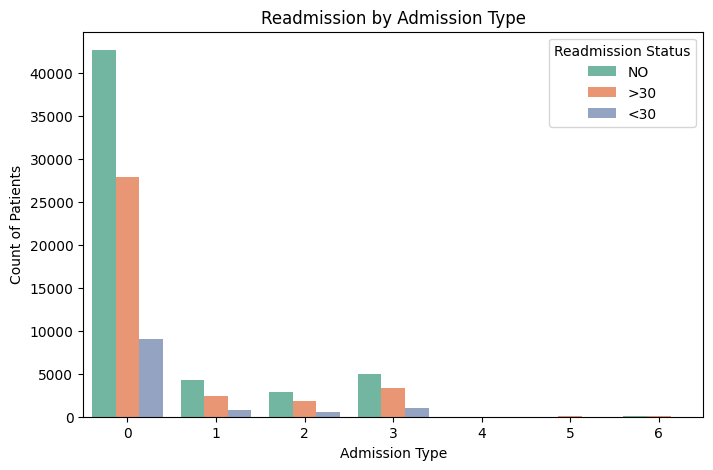

In [36]:
plt.figure(figsize=(8,5))
sns.countplot(data=df1, x='glycemic_risk_score', hue='readmitted', palette='Set2')

plt.title('Readmission by Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Count of Patients')
plt.legend(title='Readmission Status')
plt.show()

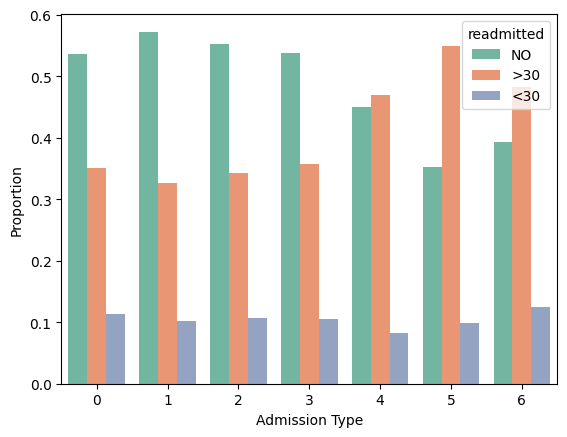

In [37]:
prop = (df1.groupby('glycemic_risk_score')['readmitted']
          .value_counts(normalize=True)
          .rename('proportion')
          .reset_index())

sns.barplot(data=prop, x='glycemic_risk_score', y='proportion', hue='readmitted', palette='Set2')
plt.xlabel('Admission Type')
plt.ylabel('Proportion')
plt.show()

In [38]:
df1.drop(['citoglipton','examide'], axis=1, inplace=True)
df1.head()

/tmp/ipython-input-2291445862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['citoglipton','examide'], axis=1, inplace=True)


encounter_id  age admission_type_id discharge_disposition_id  \
0       2278392    5     Other/Unknown            Other/Unknown   
1        149190   15         Emergency                     Home   
2         64410   25         Emergency                     Home   
3        500364   35         Emergency                     Home   
4         16680   45         Emergency                     Home   

  admission_source_id  time_in_hospital medical_specialty  num_procedures  \
0            Referral                 1     Endocrinology               0   
1           Emergency                 3           Unknown               0   
2           Emergency                 2           Unknown               5   
3           Emergency                 2           Unknown               1   
4           Emergency                 1           Unknown               0   

   number_outpatient  number_emergency  ...  glipizide-metformin  \
0                  0                 0  ...                   No   
1                  0                 0  ...                   No   
2                  2                 0  ...                   No   
3                  0                 0  ...                   No   
4                  0                 0  ...                   No   

  glimepiride-pioglitazone metformin-rosiglitazone metformin-pioglitazone  \
0                       No                      No                     No   
1                       No                      No                     No   
2                       No                      No                     No   
3                       No                      No                     No   
4                       No                      No                     No   

   change diabetesMed readmitted Treatment_intensity num_unique_diag_groups  \
0      No          No         NO                0.02                      2   
1      Ch         Yes        >30                0.31                      1   
2      No         Yes         NO                1.18                      3   
3      Ch         Yes         NO                0.36                      3   
4      Ch         Yes         NO                0.16                      2   

  glycemic_risk_score  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 42 columns]

In [39]:
drug_cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
             'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
             'rosiglitazone', 'acarbose', 'miglitol','troglitazone','tolazamide',
             'insulin','glyburide-metformin','glipizide-metformin',
             'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']

for col in drug_cols:
    df1[col] = df1[col].replace({'No': 0, 'Down': -1, 'Steady': 1, 'Up': 2})

/tmp/ipython-input-2218454761.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col] = df1[col].replace({'No': 0, 'Down': -1, 'Steady': 1, 'Up': 2})
/tmp/ipython-input-2218454761.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1[col].replace({'No': 0, 'Down': -1, 'Steady': 1, 'Up': 2})


In [40]:
df1['on_multiple_drugs'] = (df1[drug_cols].gt(0).sum(axis=1) >= 2).astype(int)
df1

/tmp/ipython-input-400257919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['on_multiple_drugs'] = (df1[drug_cols].gt(0).sum(axis=1) >= 2).astype(int)


encounter_id  age admission_type_id discharge_disposition_id  \
0            2278392    5     Other/Unknown            Other/Unknown   
1             149190   15         Emergency                     Home   
2              64410   25         Emergency                     Home   
3             500364   35         Emergency                     Home   
4              16680   45         Emergency                     Home   
...              ...  ...               ...                      ...   
101761     443847548   75         Emergency          Post-Acute Care   
101762     443847782   85         Emergency          Post-Acute Care   
101763     443854148   75         Emergency                     Home   
101764     443857166   85            Urgent          Post-Acute Care   
101765     443867222   75         Emergency                     Home   

       admission_source_id  time_in_hospital medical_specialty  \
0                 Referral                 1     Endocrinology   
1                Emergency                 3           Unknown   
2                Emergency                 2           Unknown   
3                Emergency                 2           Unknown   
4                Emergency                 1           Unknown   
...                    ...               ...               ...   
101761           Emergency                 3           Unknown   
101762       Other/Unknown                 5           Unknown   
101763           Emergency                 1           Unknown   
101764           Emergency                10           Surgery   
101765           Emergency                 6           Unknown   

        num_procedures  number_outpatient  number_emergency  ...  \
0                    0                  0                 0  ...   
1                    0                  0                 0  ...   
2                    5                  2                 0  ...   
3                    1                  0                 0  ...   
4                    0                  0                 0  ...   
...                ...                ...               ...  ...   
101761               0                  0                 0  ...   
101762               3                  0                 0  ...   
101763               0                  1                 0  ...   
101764               2                  0                 0  ...   
101765               3                  0                 0  ...   

        glimepiride-pioglitazone metformin-rosiglitazone  \
0                              0                       0   
1                              0                       0   
2                              0                       0   
3                              0                       0   
4                              0                       0   
...                          ...                     ...   
101761                         0                       0   
101762                         0                       0   
101763                         0                       0   
101764                         0                       0   
101765                         0                       0   

       metformin-pioglitazone change  diabetesMed  readmitted  \
0                           0     No           No          NO   
1                           0     Ch          Yes         >30   
2                           0     No          Yes          NO   
3                           0     Ch          Yes          NO   
4                           0     Ch          Yes          NO   
...                       ...    ...          ...         ...   
101761                      0     Ch          Yes         >30   
101762                      0     No          Yes          NO   
101763                      0     Ch          Yes          NO   
101764                      0     Ch          Yes          NO   
101765                      0     No           No          NO   

        Treatment_intensity  nu

In [41]:
df1['change'] = df1['change'].replace({'Ch': 1, 'No': 0})
df1['diabetesMed'] = df1['diabetesMed'].replace({'Yes': 1, 'No': 0})
df1

/tmp/ipython-input-2864187823.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['change'] = df1['change'].replace({'Ch': 1, 'No': 0})
/tmp/ipython-input-2864187823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['change'] = df1['change'].replace({'Ch': 1, 'No': 0})
/tmp/ipython-input-2864187823.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future 

encounter_id  age admission_type_id discharge_disposition_id  \
0            2278392    5     Other/Unknown            Other/Unknown   
1             149190   15         Emergency                     Home   
2              64410   25         Emergency                     Home   
3             500364   35         Emergency                     Home   
4              16680   45         Emergency                     Home   
...              ...  ...               ...                      ...   
101761     443847548   75         Emergency          Post-Acute Care   
101762     443847782   85         Emergency          Post-Acute Care   
101763     443854148   75         Emergency                     Home   
101764     443857166   85            Urgent          Post-Acute Care   
101765     443867222   75         Emergency                     Home   

       admission_source_id  time_in_hospital medical_specialty  \
0                 Referral                 1     Endocrinology   
1                Emergency                 3           Unknown   
2                Emergency                 2           Unknown   
3                Emergency                 2           Unknown   
4                Emergency                 1           Unknown   
...                    ...               ...               ...   
101761           Emergency                 3           Unknown   
101762       Other/Unknown                 5           Unknown   
101763           Emergency                 1           Unknown   
101764           Emergency                10           Surgery   
101765           Emergency                 6           Unknown   

        num_procedures  number_outpatient  number_emergency  ...  \
0                    0                  0                 0  ...   
1                    0                  0                 0  ...   
2                    5                  2                 0  ...   
3                    1                  0                 0  ...   
4                    0                  0                 0  ...   
...                ...                ...               ...  ...   
101761               0                  0                 0  ...   
101762               3                  0                 0  ...   
101763               0                  1                 0  ...   
101764               2                  0                 0  ...   
101765               3                  0                 0  ...   

        glimepiride-pioglitazone metformin-rosiglitazone  \
0                              0                       0   
1                              0                       0   
2                              0                       0   
3                              0                       0   
4                              0                       0   
...                          ...                     ...   
101761                         0                       0   
101762                         0                       0   
101763                         0                       0   
101764                         0                       0   
101765                         0                       0   

       metformin-pioglitazone change  diabetesMed  readmitted  \
0                           0      0            0          NO   
1                           0      1            1         >30   
2                           0      0            1          NO   
3                           0      1            1          NO   
4                           0      1            1          NO   
...                       ...    ...          ...         ...   
101761                      0      1            1         >30   
101762                      0      0            1          NO   
101763                      0      1            1          NO   
101764                      0      1            1          NO   
101765                      0      0            0          NO   

        Treatment_intensity  nu

In [42]:
df1['readmitted'] = df1['readmitted'].replace({
    '<30': 1,
    '>30': 0,
    'NO': 0
})
df1

/tmp/ipython-input-3423878256.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['readmitted'] = df1['readmitted'].replace({
/tmp/ipython-input-3423878256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['readmitted'] = df1['readmitted'].replace({


encounter_id  age admission_type_id discharge_disposition_id  \
0            2278392    5     Other/Unknown            Other/Unknown   
1             149190   15         Emergency                     Home   
2              64410   25         Emergency                     Home   
3             500364   35         Emergency                     Home   
4              16680   45         Emergency                     Home   
...              ...  ...               ...                      ...   
101761     443847548   75         Emergency          Post-Acute Care   
101762     443847782   85         Emergency          Post-Acute Care   
101763     443854148   75         Emergency                     Home   
101764     443857166   85            Urgent          Post-Acute Care   
101765     443867222   75         Emergency                     Home   

       admission_source_id  time_in_hospital medical_specialty  \
0                 Referral                 1     Endocrinology   
1                Emergency                 3           Unknown   
2                Emergency                 2           Unknown   
3                Emergency                 2           Unknown   
4                Emergency                 1           Unknown   
...                    ...               ...               ...   
101761           Emergency                 3           Unknown   
101762       Other/Unknown                 5           Unknown   
101763           Emergency                 1           Unknown   
101764           Emergency                10           Surgery   
101765           Emergency                 6           Unknown   

        num_procedures  number_outpatient  number_emergency  ...  \
0                    0                  0                 0  ...   
1                    0                  0                 0  ...   
2                    5                  2                 0  ...   
3                    1                  0                 0  ...   
4                    0                  0                 0  ...   
...                ...                ...               ...  ...   
101761               0                  0                 0  ...   
101762               3                  0                 0  ...   
101763               0                  1                 0  ...   
101764               2                  0                 0  ...   
101765               3                  0                 0  ...   

        glimepiride-pioglitazone metformin-rosiglitazone  \
0                              0                       0   
1                              0                       0   
2                              0                       0   
3                              0                       0   
4                              0                       0   
...                          ...                     ...   
101761                         0                       0   
101762                         0                       0   
101763                         0                       0   
101764                         0                       0   
101765                         0                       0   

       metformin-pioglitazone change  diabetesMed  readmitted  \
0                           0      0            0           0   
1                           0      1            1           0   
2                           0      0            1           0   
3                           0      1            1           0   
4                           0      1            1           0   
...                       ...    ...          ...         ...   
101761                      0      1            1           0   
101762                      0      0            1           0   
101763                      0      1            1           0   
101764                      0      1            1           0   
101765                      0      0            0           0   

        Treatment_intensity  nu

In [43]:
df1['readmitted'].value_counts()

readmitted
0    90393
1    11352
Name: count, dtype: int64

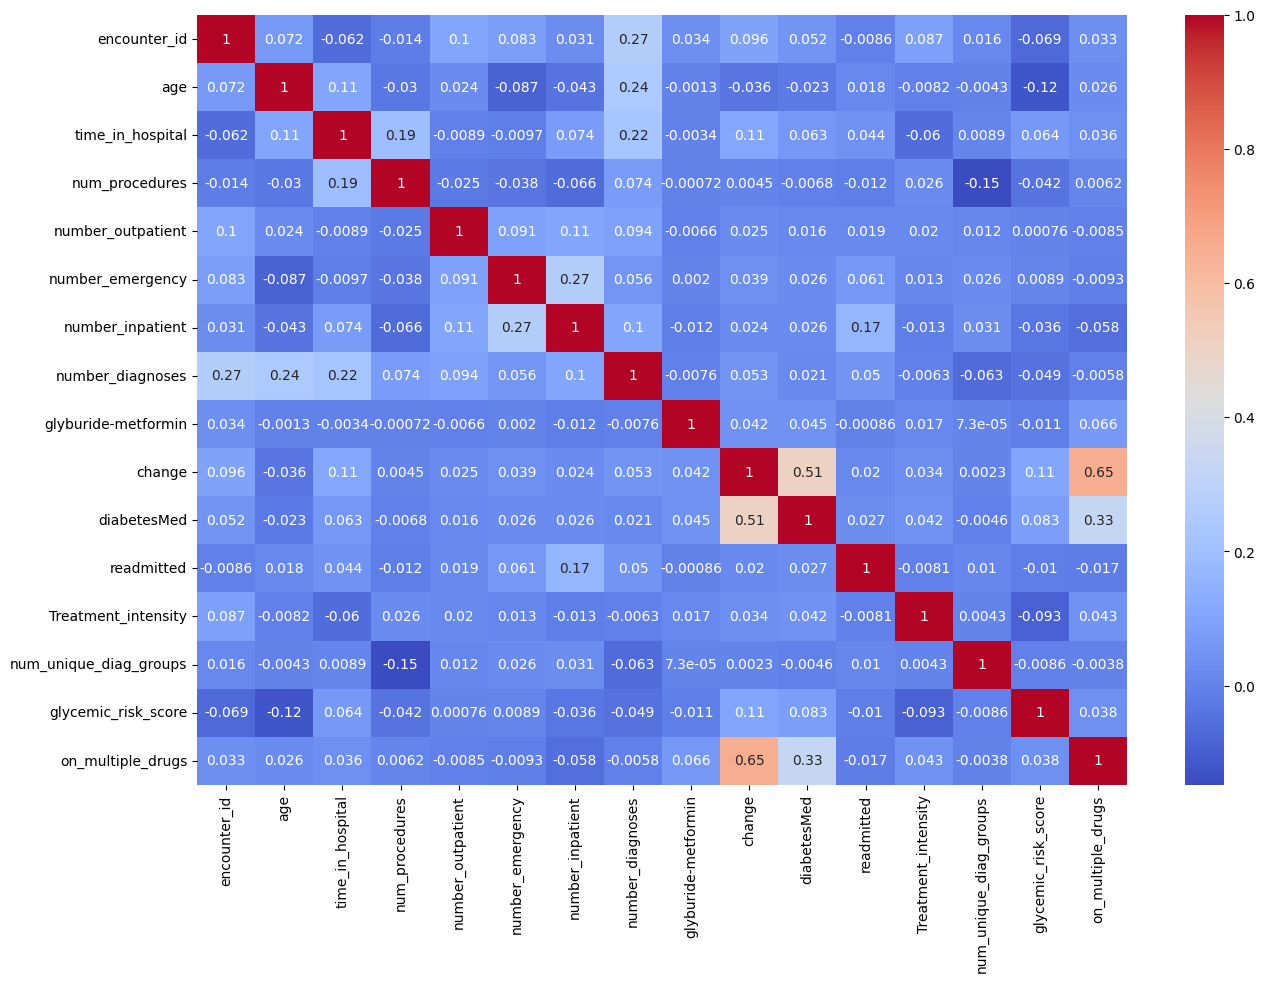

In [44]:
drug_cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
             'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
             'rosiglitazone', 'acarbose', 'miglitol','troglitazone','tolazamide',
             'insulin','8glyburide-metformin','glipizide-metformin',
             'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone',
             'examide', 'citoglipton']
isnum = df1.select_dtypes(include=np.number).columns
isnum = [col for col in isnum if col not in drug_cols]
plt.figure(figsize=(15,10))
sns.heatmap(df1[isnum].corr(), annot=True, cmap='coolwarm')
plt.show()

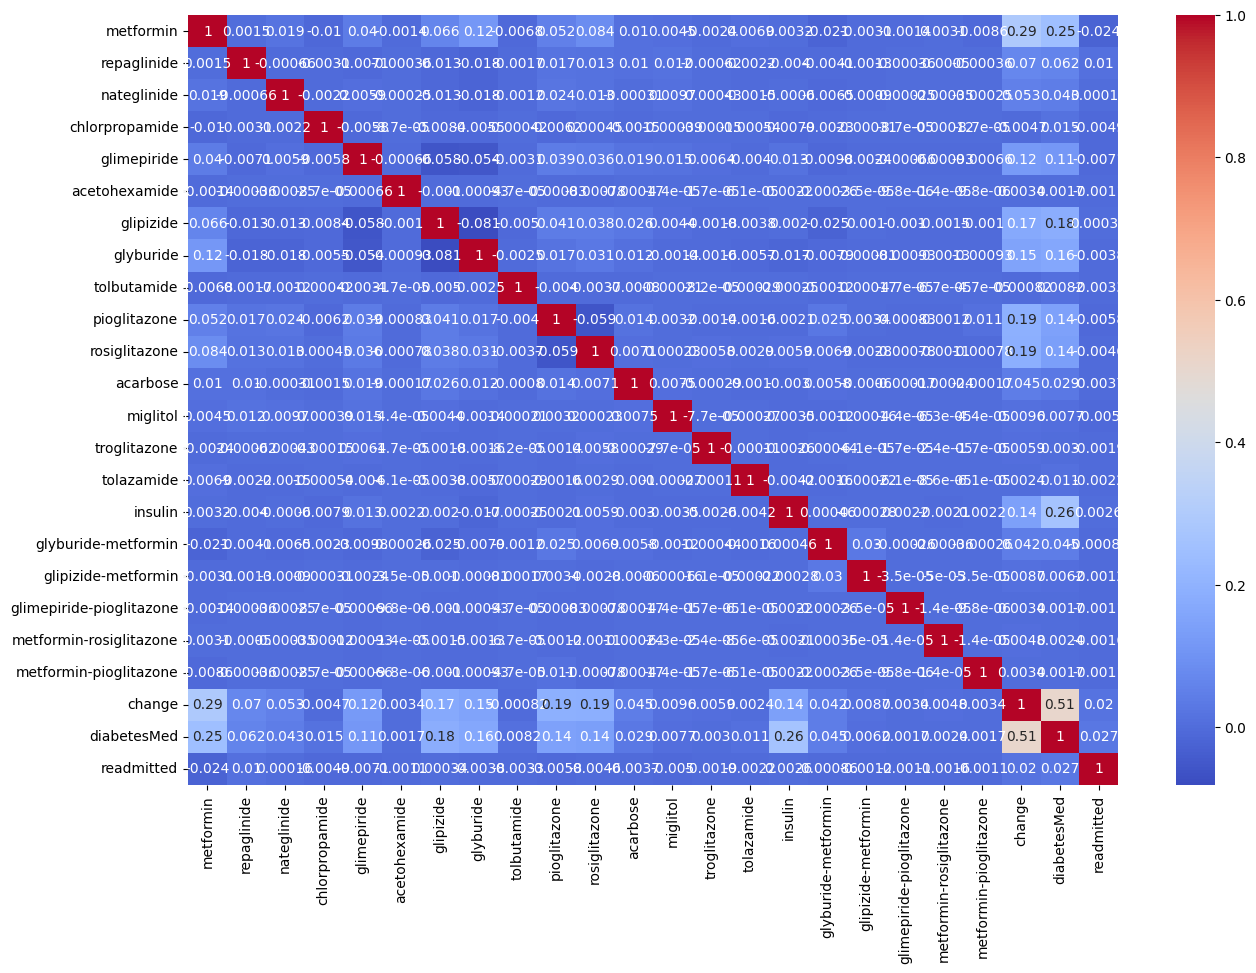

In [45]:
drug_cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
             'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
             'rosiglitazone', 'acarbose', 'miglitol','troglitazone','tolazamide',
             'insulin','glyburide-metformin','glipizide-metformin',
             'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']

medicine_and_diabetes_cols = drug_cols + ['change', 'diabetesMed', 'readmitted']

plt.figure(figsize=(15,10))
sns.heatmap(df1[medicine_and_diabetes_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

In [46]:
df1.columns

Index(['encounter_id', 'age', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'medical_specialty',
       'num_procedures', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'Treatment_intensity', 'num_unique_diag_groups', 'glycemic_risk_score',
       'on_multiple_drugs'],
      dtype='object')

In [47]:
cat_cols = df1.select_dtypes(exclude=['number']).columns
cat_cols

Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3'],
      dtype='object')

In [48]:
df2 = df1.copy()
df2

encounter_id  age admission_type_id discharge_disposition_id  \
0            2278392    5     Other/Unknown            Other/Unknown   
1             149190   15         Emergency                     Home   
2              64410   25         Emergency                     Home   
3             500364   35         Emergency                     Home   
4              16680   45         Emergency                     Home   
...              ...  ...               ...                      ...   
101761     443847548   75         Emergency          Post-Acute Care   
101762     443847782   85         Emergency          Post-Acute Care   
101763     443854148   75         Emergency                     Home   
101764     443857166   85            Urgent          Post-Acute Care   
101765     443867222   75         Emergency                     Home   

       admission_source_id  time_in_hospital medical_specialty  \
0                 Referral                 1     Endocrinology   
1                Emergency                 3           Unknown   
2                Emergency                 2           Unknown   
3                Emergency                 2           Unknown   
4                Emergency                 1           Unknown   
...                    ...               ...               ...   
101761           Emergency                 3           Unknown   
101762       Other/Unknown                 5           Unknown   
101763           Emergency                 1           Unknown   
101764           Emergency                10           Surgery   
101765           Emergency                 6           Unknown   

        num_procedures  number_outpatient  number_emergency  ...  \
0                    0                  0                 0  ...   
1                    0                  0                 0  ...   
2                    5                  2                 0  ...   
3                    1                  0                 0  ...   
4                    0                  0                 0  ...   
...                ...                ...               ...  ...   
101761               0                  0                 0  ...   
101762               3                  0                 0  ...   
101763               0                  1                 0  ...   
101764               2                  0                 0  ...   
101765               3                  0                 0  ...   

        glimepiride-pioglitazone metformin-rosiglitazone  \
0                              0                       0   
1                              0                       0   
2                              0                       0   
3                              0                       0   
4                              0                       0   
...                          ...                     ...   
101761                         0                       0   
101762                         0                       0   
101763                         0                       0   
101764                         0                       0   
101765                         0                       0   

       metformin-pioglitazone change  diabetesMed  readmitted  \
0                           0      0            0           0   
1                           0      1            1           0   
2                           0      0            1           0   
3                           0      1            1           0   
4                           0      1            1           0   
...                       ...    ...          ...         ...   
101761                      0      1            1           0   
101762                      0      0            1           0   
101763                      0      1            1           0   
101764                      0      1            1           0   
101765                      0      0            0           0   

        Treatment_intensity  nu

In [49]:
x = df2.drop(columns=['readmitted'])
x = x.select_dtypes(include=['number'])
x = x.abs()
y = df2['readmitted']

chi_scores = chi2(x, y)

p_values = pd.Series(chi_scores[1], index=x.columns)
p_values.sort_values(ascending=False, inplace=True)

print(p_values)

nateglinide                 9.998086e-01
glyburide-metformin         8.432844e-01
miglitol                    8.161645e-01
metformin-pioglitazone      7.230544e-01
glimepiride-pioglitazone    7.230544e-01
acetohexamide               7.230544e-01
glipizide-metformin         6.915066e-01
metformin-rosiglitazone     6.162525e-01
troglitazone                5.393451e-01
tolazamide                  4.625319e-01
acarbose                    3.290145e-01
tolbutamide                 2.996151e-01
glipizide                   1.795838e-01
num_unique_diag_groups      1.672537e-01
pioglitazone                1.390926e-01
chlorpropamide              8.126807e-02
rosiglitazone               6.670151e-02
glyburide                   5.905064e-02
glimepiride                 3.831692e-02
repaglinide                 1.335979e-03
diabetesMed                 3.536712e-05
change                      4.948295e-06
glycemic_risk_score         4.203088e-06
on_multiple_drugs           1.828953e-06
num_procedures  

In [50]:
i_cols=[]
significance_level = 0.05
for i in p_values.index:
    if p_values[i] <= significance_level:
        print(i,':- Reject NULL HYPOTHESIS')
    else:
        print(i,':-ACCEPT NULL HYPOTHESIS')
        i_cols.append(i)

nateglinide :-ACCEPT NULL HYPOTHESIS
glyburide-metformin :-ACCEPT NULL HYPOTHESIS
miglitol :-ACCEPT NULL HYPOTHESIS
metformin-pioglitazone :-ACCEPT NULL HYPOTHESIS
glimepiride-pioglitazone :-ACCEPT NULL HYPOTHESIS
acetohexamide :-ACCEPT NULL HYPOTHESIS
glipizide-metformin :-ACCEPT NULL HYPOTHESIS
metformin-rosiglitazone :-ACCEPT NULL HYPOTHESIS
troglitazone :-ACCEPT NULL HYPOTHESIS
tolazamide :-ACCEPT NULL HYPOTHESIS
acarbose :-ACCEPT NULL HYPOTHESIS
tolbutamide :-ACCEPT NULL HYPOTHESIS
glipizide :-ACCEPT NULL HYPOTHESIS
num_unique_diag_groups :-ACCEPT NULL HYPOTHESIS
pioglitazone :-ACCEPT NULL HYPOTHESIS
chlorpropamide :-ACCEPT NULL HYPOTHESIS
rosiglitazone :-ACCEPT NULL HYPOTHESIS
glyburide :-ACCEPT NULL HYPOTHESIS
glimepiride :- Reject NULL HYPOTHESIS
repaglinide :- Reject NULL HYPOTHESIS
diabetesMed :- Reject NULL HYPOTHESIS
change :- Reject NULL HYPOTHESIS
glycemic_risk_score :- Reject NULL HYPOTHESIS
on_multiple_drugs :- Reject NULL HYPOTHESIS
num_procedures :- Reject NULL HYPOTH

In [51]:
print(i_cols)

['nateglinide', 'glyburide-metformin', 'miglitol', 'metformin-pioglitazone', 'glimepiride-pioglitazone', 'acetohexamide', 'glipizide-metformin', 'metformin-rosiglitazone', 'troglitazone', 'tolazamide', 'acarbose', 'tolbutamide', 'glipizide', 'num_unique_diag_groups', 'pioglitazone', 'chlorpropamide', 'rosiglitazone', 'glyburide']


In [52]:
#df3.drop(i_cols, axis=1, inplace=True)
#df3.head()

In [53]:
df2.columns

Index(['encounter_id', 'age', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'medical_specialty',
       'num_procedures', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'Treatment_intensity', 'num_unique_diag_groups', 'glycemic_risk_score',
       'on_multiple_drugs'],
      dtype='object')

# Model BUilding and Testing

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.over_sampling import SMOTENC

In [55]:
x = df2.drop(['readmitted','encounter_id'], axis=1)
y = df2['readmitted']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [56]:
categorical_ids = [1,2,3,5,10,11,12]
categorical_cols = x_train.columns[categorical_ids]

In [57]:
from sklearn.preprocessing import LabelEncoder

encoders = {}
x_train_le = x_train.copy()
x_test_le = x_test.copy()

for col in categorical_cols:
    le = LabelEncoder()
    x_train_le[col] = le.fit_transform(x_train_le[col])
    x_test_le[col] = le.transform(x_test_le[col])
    encoders[col] = le

In [58]:
smote = SMOTENC(
    categorical_features=categorical_ids,
    sampling_strategy='minority',
    random_state=42
)

X_train, Y_train = smote.fit_resample(x_train_le, y_train)


In [59]:
from sklearn.preprocessing import StandardScaler

num_cols = [col for col in X_train.columns if col not in categorical_cols]

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
x_test_le[num_cols] = scaler.transform(x_test_le[num_cols])

In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
!pip install catboost
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import f1_score, roc_auc_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.7 MB/s eta 0:00:00


In [61]:
# LDA
lda = LDA(solver='lsqr', shrinkage= 'auto')

lda.fit(X_train,Y_train)

pred_lda = lda.predict(x_test_le)

lda_train_acc = lda.score(X_train, Y_train)
lda_test_acc = lda.score(x_test_le, y_test)

print("LDA Training Accuracy:", lda_train_acc)
print("LDA Test Accuracy:", lda_test_acc)

lda_f1_score = f1_score(y_test, pred_lda, average='weighted')
print("LDA F1 Score:", lda_f1_score)

lda_classification_report = classification_report(y_test, pred_lda)
print("LDA Classification Report:\n", lda_classification_report)

LDA Training Accuracy: 0.6739773764416296
LDA Test Accuracy: 0.6189493341196127
LDA F1 Score: 0.6887691428811524
LDA Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.64      0.75     18079
           1       0.14      0.45      0.21      2270

    accuracy                           0.62     20349
   macro avg       0.52      0.54      0.48     20349
weighted avg       0.82      0.62      0.69     20349



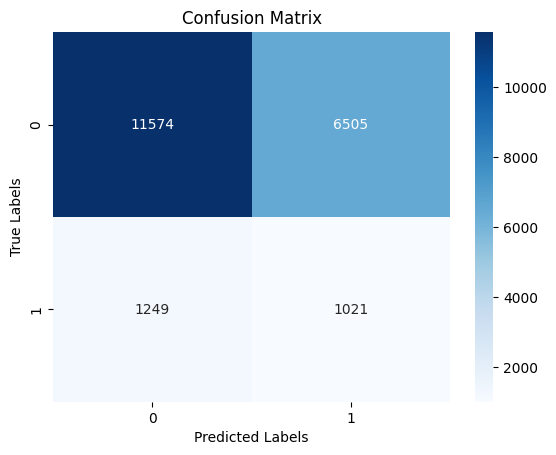

In [62]:
lda_cm = confusion_matrix(y_test, pred_lda)

sns.heatmap(lda_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [63]:
# 10 most significantfeatures
lda_coef = lda.coef_
feature_names = x.columns
significant_features = sorted(zip(feature_names, lda_coef[0]), key=lambda x: abs(x[1]), reverse=True)[:10]
for feature, coef in significant_features:
    print(f"{feature}: {coef}")

number_inpatient: 0.2819489530388186
metformin: -0.2327538912087202
pioglitazone: -0.20690052140370963
glyburide: -0.18891109358350566
glimepiride: -0.18287366368301936
glipizide: -0.18234941545648176
rosiglitazone: -0.176780004907737
num_procedures: -0.1740538216425326
num_unique_diag_groups: -0.1661620479848111
admission_source_id: -0.1493576903009427


In [64]:
# Logestic Regression

lr = LogisticRegression(
    max_iter=3000,
    solver="saga",
    penalty="elasticnet",
    l1_ratio=0.4,
)

lr.fit(X_train,Y_train)

pred_lr = lr.predict(x_test_le)
y_prob = lr.predict_proba(x_test_le)[:, 1]

lr_train_acc = lr.score(X_train, Y_train)
lr_test_acc = lr.score(x_test_le, y_test)
lr_f1 = f1_score(y_test, pred_lr, average='weighted')
lr_auc = roc_auc_score(y_test, y_prob)

print("Logistic Regression Training Accuracy:", lr_train_acc)
print("Logistic Regression Test Accuracy:", lr_test_acc)
print("Logistic Regression F1 Score:", lr_f1)
print("Logistic Regression AUC:", lr_auc)
print("Logistic Regression Classification Report:\n", classification_report(y_test, pred_lr))

Logistic Regression Training Accuracy: 0.6846806980667643
Logistic Regression Test Accuracy: 0.6392943142169148
Logistic Regression F1 Score: 0.7042391917545916
Logistic Regression AUC: 0.5653414907114712
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.67      0.77     18079
           1       0.14      0.43      0.21      2270

    accuracy                           0.64     20349
   macro avg       0.52      0.55      0.49     20349
weighted avg       0.82      0.64      0.70     20349



In [65]:
lr_coef = lr.coef_
feature_names = x.columns
significant_features = sorted(zip(feature_names, lr_coef[0]), key=lambda x: abs(x[1]), reverse=True)[:10]
for feature, coef in significant_features:
    print(f"{feature}: {coef}")

on_multiple_drugs: 0.45403410792301935
metformin: -0.39941218930872113
glipizide: -0.3259189573176294
pioglitazone: -0.32485921373252086
glyburide: -0.3212542755831743
glimepiride: -0.29671090415375656
number_inpatient: 0.2903143315323524
rosiglitazone: -0.27998345281382037
diabetesMed: 0.2217559542860035
insulin: -0.21611177049946623


Text(50.722222222222214, 0.5, 'True Labels')

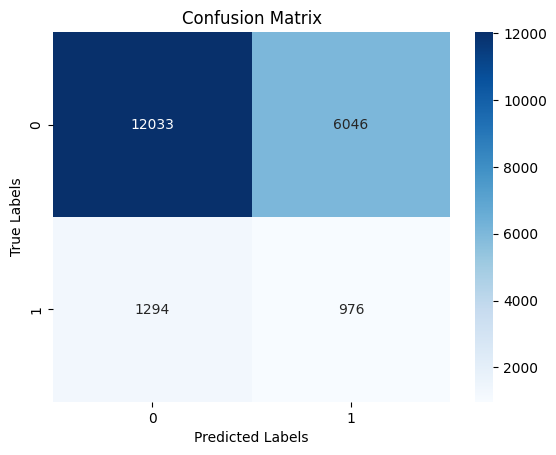

In [66]:
lr_cm = confusion_matrix(y_test, pred_lr)

sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

In [67]:
# Descion Tree

dt = DecisionTreeClassifier(criterion='gini', max_depth=30, max_features=None)

dt.fit(X_train,Y_train)

pred_dt = dt.predict(x_test_le)

dt_train_acc = dt.score(X_train, Y_train)
dt_test_acc = dt.score(x_test_le, y_test)

print("Decision Tree Training Accuracy:", dt_train_acc)
print("Decision Tree Test Accuracy:", dt_test_acc)
print("Decision Tree F1 Score:", f1_score(y_test, pred_dt, average='weighted'))
print("Decision Tree Classification Report:\n", classification_report(y_test, pred_dt))

Decision Tree Training Accuracy: 0.977390270210471
Decision Tree Test Accuracy: 0.6944813012924468
Decision Tree F1 Score: 0.7424436545522707
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.74      0.81     18079
           1       0.14      0.32      0.19      2270

    accuracy                           0.69     20349
   macro avg       0.52      0.53      0.50     20349
weighted avg       0.81      0.69      0.74     20349



Text(50.722222222222214, 0.5, 'True Labels')

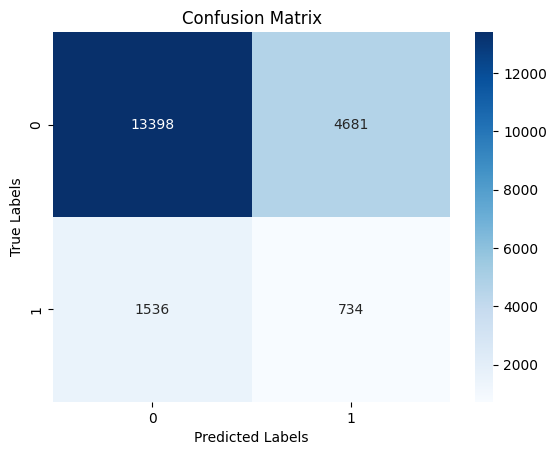

In [68]:
dt_cm = confusion_matrix(y_test, pred_dt)

sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

In [69]:
rf = RandomForestClassifier(n_estimators=800, max_depth = 18, random_state=42)

rf.fit(X_train,Y_train)

pred_rf = rf.predict(x_test_le)

rf_train_acc = rf.score(X_train, Y_train)
rf_test_acc = rf.score(x_test_le, y_test)
rf_f1 = f1_score(y_test, pred_rf, average='weighted')
rf_auc = roc_auc_score(y_test, pred_rf)

print("Random Forest Training Accuracy:", round(rf_train_acc, 4))
print("Random Forest Test Accuracy:", round(rf_test_acc, 4))
print("Random Forest F1 Score:", round(rf_f1, 4))
print("Random Forest AUC:", round(rf_auc, 4))

print("Classification Report:\n", classification_report(y_test, pred_rf))
print("Confusion Matrix Random Forest:\n", confusion_matrix(y_test, pred_rf))

Random Forest Training Accuracy: 0.8933
Random Forest Test Accuracy: 0.731
Random Forest F1 Score: 0.7671
Random Forest AUC: 0.5426
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84     18079
           1       0.15      0.30      0.20      2270

    accuracy                           0.73     20349
   macro avg       0.52      0.54      0.52     20349
weighted avg       0.82      0.73      0.77     20349

Confusion Matrix Random Forest:
 [[14195  3884]
 [ 1589   681]]


In [70]:
ct = CatBoostClassifier(
    iterations=500,
    learning_rate=0.03,
    depth=8,
    l2_leaf_reg=5,
    bagging_temperature=0.5,
    loss_function='Logloss',
    eval_metric='F1',
    random_seed=42,
    verbose=100
)

ct.fit(X_train, Y_train, eval_set=(x_test_le, y_test), early_stopping_rounds=50, use_best_model=True)

pred_ct = ct.predict(x_test_le)

ct_train_acc = ct.score(X_train, Y_train)
ct_test_acc = ct.score(x_test_le, y_test)

print("Catboost Training Accuracy:", ct_train_acc)
print("Catboost Test Accuracy:", ct_test_acc)
print("Catboost F1 Score:", f1_score(y_test, pred_ct, average='weighted'))
print("Catboost Classification Report:\n", classification_report(y_test, pred_ct))

0:	learn: 0.6596536	test: 0.1963100	best: 0.1963100 (0)	total: 145ms	remaining: 1m 12s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.2068719534
bestIteration = 47

Shrink model to first 48 iterations.
Catboost Training Accuracy: 0.7160093481206958
Catboost Test Accuracy: 0.6721706226350189
Catboost F1 Score: 0.727956887962568
Catboost Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.71      0.79     18079
           1       0.14      0.38      0.21      2270

    accuracy                           0.67     20349
   macro avg       0.52      0.55      0.50     20349
weighted avg       0.82      0.67      0.73     20349



Text(50.722222222222214, 0.5, 'True Labels')

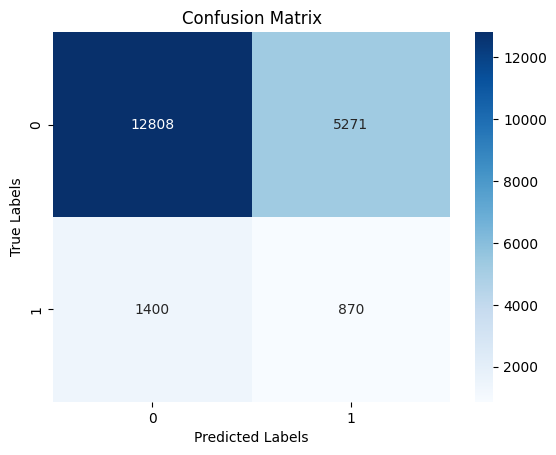

In [71]:
cat_cm = confusion_matrix(y_test, pred_ct)

sns.heatmap(cat_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

In [72]:
# Xgboost

xb = xgb.XGBClassifier(
    objective='binary:logistic',
    learning_rate=0.03,
    n_estimators=1000,
    max_depth=6,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    reg_lambda=1.2,
    reg_alpha=0.3,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

xb.fit(X_train,Y_train)

pred_xb = xb.predict(x_test_le)

xb_train_acc = xb.score(X_train, Y_train)
xb_test_acc = xb.score(x_test_le, y_test)
probs = xb.predict_proba(x_test_le)[:, 1]

print("Xgboost Training Accuracy:", xb_train_acc)
print("Xgboost Test Accuracy:", xb_test_acc)
print("Xgboost F1 Score:", f1_score(y_test, pred_xb, average='weighted'))
print("Xgboost AUC:", roc_auc_score(y_test, probs))
print("Xgboost Classification Report:\n", classification_report(y_test, pred_xb))

Xgboost Training Accuracy: 0.8482174959205686
Xgboost Test Accuracy: 0.7864759939063345
Xgboost F1 Score: 0.8009721949787586
Xgboost AUC: 0.5925271562669274
Xgboost Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88     18079
           1       0.17      0.23      0.20      2270

    accuracy                           0.79     20349
   macro avg       0.53      0.54      0.54     20349
weighted avg       0.82      0.79      0.80     20349



Text(0.5, 1.0, 'Confusion Matrix')

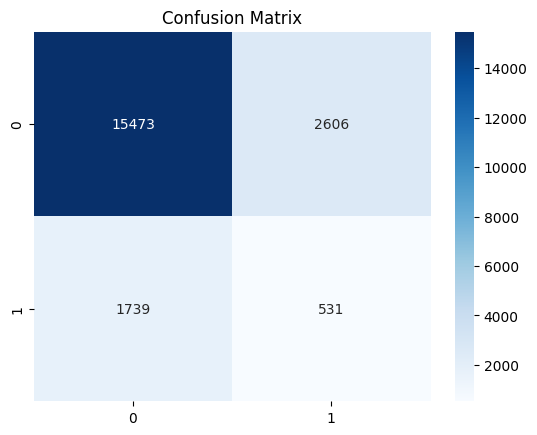

In [73]:
xgb_cm = confusion_matrix(y_test, pred_xb)

sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')

In [74]:
xg_fi = xb.feature_importances_
feature_names = x.columns
significant_features = sorted(zip(feature_names, xg_fi), key=lambda x: abs(x[1]), reverse=True)[:10]
for feature, coef in significant_features:
    print(f"{feature}: {coef}")

metformin: 0.06132273003458977
medical_specialty: 0.05789349973201752
Treatment_intensity: 0.05577056109905243
admission_source_id: 0.055353794246912
glimepiride: 0.052791666239500046
pioglitazone: 0.05275464802980423
glyburide: 0.049113012850284576
rosiglitazone: 0.042695291340351105
glipizide: 0.042321957647800446
discharge_disposition_id: 0.03671478480100632


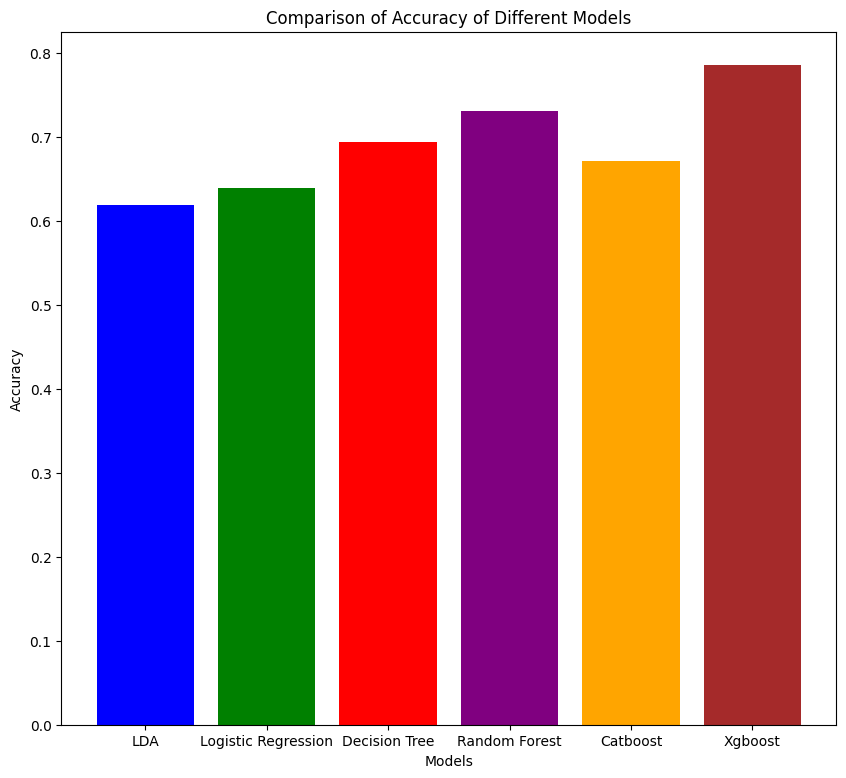

In [75]:
plt.figure(figsize=(10, 9))
plt.bar(x=['LDA', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'Catboost', 'Xgboost'],
        height=[lda_test_acc, lr_test_acc, dt_test_acc, rf_test_acc, ct_test_acc, xb_test_acc],
        color=['blue', 'green', 'red', 'purple', 'orange', 'brown'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy of Different Models')
plt.show()

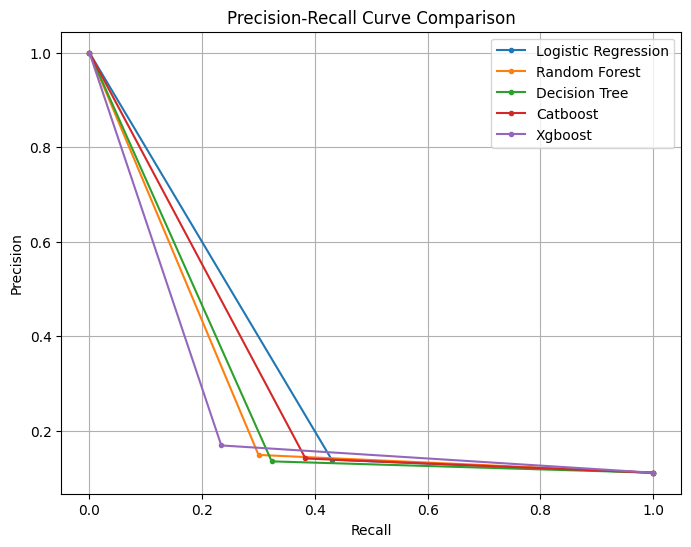

In [76]:
from sklearn.metrics import precision_recall_curve


# Logistic Regression predictions
precision_lr, recall_lr, _ = precision_recall_curve(y_test, pred_lr)

# Decision Tree predictions
precision_dt, recall_dt, _ = precision_recall_curve(y_test, pred_dt)

# Random Forest predictions
precision_rf, recall_rf, _ = precision_recall_curve(y_test, pred_rf)

# Xg Boost
precision_xb, recall_xb, _ = precision_recall_curve(y_test, pred_xb)

# Catboost
precision_ct, recall_ct, _ = precision_recall_curve(y_test, pred_ct)

# Plot both curves
plt.figure(figsize=(8,6))
plt.plot(recall_lr, precision_lr, marker='.', label='Logistic Regression')
plt.plot(recall_rf, precision_rf, marker='.', label='Random Forest')
plt.plot(recall_dt, precision_dt, marker='.', label='Decision Tree')
plt.plot(recall_ct, precision_ct, marker='.', label='Catboost')
plt.plot(recall_xb, precision_xb, marker='.', label='Xgboost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.grid()
plt.legend()
plt.show()

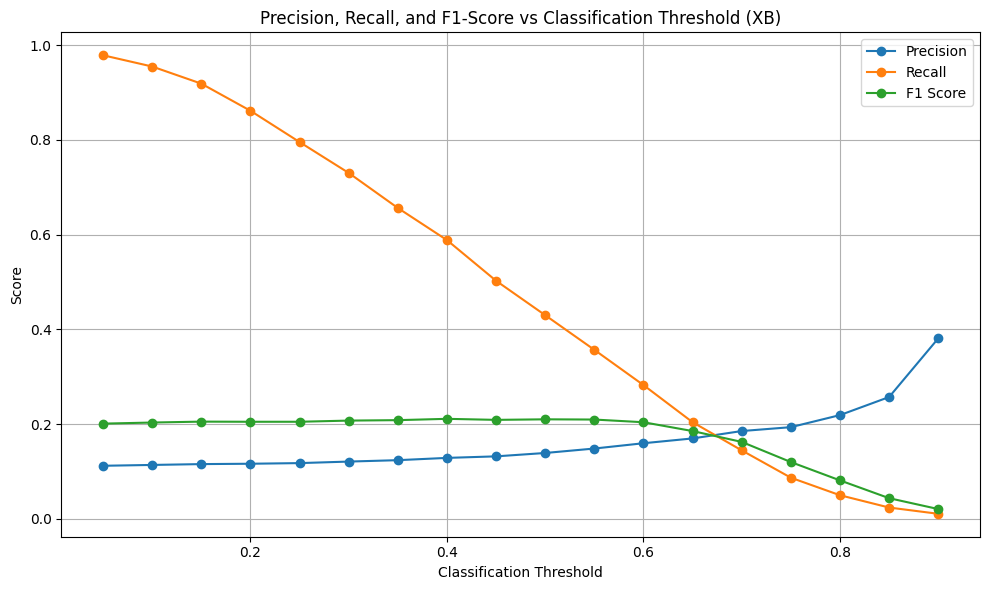

In [77]:
from sklearn.metrics import precision_recall_fscore_support

# Get predicted probabilities
lr_proba = lr.predict_proba(x_test_le)[:, 1]

# Define thresholds
thresholds = np.arange(0.05, 0.95, 0.05)
precision_scores = []
recall_scores = []
f1_scores = []

# Calculate scores at each threshold
for threshold in thresholds:
    preds = (lr_proba >= threshold).astype(int)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_test, preds, average='binary', zero_division=0
    )
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores, label='Precision', marker='o')
plt.plot(thresholds, recall_scores, label='Recall', marker='o')
plt.plot(thresholds, f1_scores, label='F1 Score', marker='o')

plt.title('Precision, Recall, and F1-Score vs Classification Threshold (XB)')
plt.xlabel('Classification Threshold')
plt.ylabel('Score')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Risk Scoring

In [78]:
def calculate_risk_score(p):
  if p >= 0.6:
    return "High Risk"
  elif p >= 0.3:
    return "Medium Risk"
  else:
    return "Low Risk"

probs = xb.predict_proba(x_test_le)[:, 1]
risk_scores = [calculate_risk_score(p) for p in probs]

risk_score_df = pd.DataFrame({
    'Probability': probs,
    'Risk Score': risk_scores
})

display(risk_score_df)


Probability   Risk Score
0         0.004740     Low Risk
1         0.104927     Low Risk
2         0.330901  Medium Risk
3         0.232593     Low Risk
4         0.371891  Medium Risk
...            ...          ...
20344     0.116579     Low Risk
20345     0.095752     Low Risk
20346     0.331750  Medium Risk
20347     0.580608  Medium Risk
20348     0.099743     Low Risk

[20349 rows x 2 columns]

In [79]:
risk_score_df = risk_score_df.merge(df2[['medical_specialty']], left_index=True, right_index=True)

display(risk_score_df.head())

Probability   Risk Score medical_specialty
0     0.004740     Low Risk     Endocrinology
1     0.104927     Low Risk           Unknown
2     0.330901  Medium Risk           Unknown
3     0.232593     Low Risk           Unknown
4     0.371891  Medium Risk           Unknown

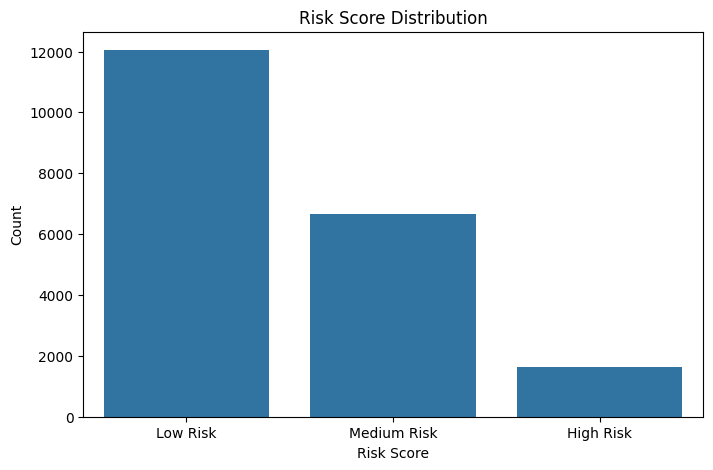

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x='Risk Score', data=risk_score_df)
plt.title('Risk Score Distribution')
plt.xlabel('Risk Score')
plt.ylabel('Count')
plt.show()

In [81]:
follow_up_plan = {
    "Low Risk": {"days": "14–30 days", "method": "Automated SMS/Email", "responsible": "Automated system"},
    "Medium Risk": {"days": "7–14 days", "method": "Nurse call / Teleconsult", "responsible": "Nurse"},
    "High Risk": {"days": "2–5 days", "method": "Doctor call / Home visit", "responsible": "Doctor"}
}

risk_score_df["follow_up_days"] = risk_score_df["Risk Score"].map(lambda x: follow_up_plan[x]["days"])
risk_score_df["follow_up_method"] = risk_score_df["Risk Score"].map(lambda x: follow_up_plan[x]["method"])
risk_score_df["assigned_to"] = risk_score_df["Risk Score"].map(lambda x: follow_up_plan[x]["responsible"])

risk_score_df.head()

Probability   Risk Score medical_specialty follow_up_days  \
0     0.004740     Low Risk     Endocrinology     14–30 days   
1     0.104927     Low Risk           Unknown     14–30 days   
2     0.330901  Medium Risk           Unknown      7–14 days   
3     0.232593     Low Risk           Unknown     14–30 days   
4     0.371891  Medium Risk           Unknown      7–14 days   

           follow_up_method       assigned_to  
0       Automated SMS/Email  Automated system  
1       Automated SMS/Email  Automated system  
2  Nurse call / Teleconsult             Nurse  
3       Automated SMS/Email  Automated system  
4  Nurse call / Teleconsult             Nurse

In [82]:
risk_score_df = risk_score_df.reset_index(drop=True)
records_per_week = 10
n_weeks = int(np.ceil(len(risk_score_df) / records_per_week))

risk_score_df['week'] = np.repeat(
    [f'Week {i+1}' for i in range(n_weeks)],
    records_per_week
)[:len(risk_score_df)]

risk_score_df.head()

Probability   Risk Score medical_specialty follow_up_days  \
0     0.004740     Low Risk     Endocrinology     14–30 days   
1     0.104927     Low Risk           Unknown     14–30 days   
2     0.330901  Medium Risk           Unknown      7–14 days   
3     0.232593     Low Risk           Unknown     14–30 days   
4     0.371891  Medium Risk           Unknown      7–14 days   

           follow_up_method       assigned_to    week  
0       Automated SMS/Email  Automated system  Week 1  
1       Automated SMS/Email  Automated system  Week 1  
2  Nurse call / Teleconsult             Nurse  Week 1  
3       Automated SMS/Email  Automated system  Week 1  
4  Nurse call / Teleconsult             Nurse  Week 1

In [83]:
# Summarize Staff Requirement by Week + Department + Staff Type
weekly_dept = (
    risk_score_df.groupby(['week', 'medical_specialty', 'assigned_to'])
    .size()
    .reset_index(name='Count')
)

# Rename columns for clarity
weekly_dept = weekly_dept.rename(columns={'medical_specialty': 'department'})

weekly_dept

week          department       assigned_to  Count
0        Week 1       Endocrinology  Automated system      1
1        Week 1    InternalMedicine  Automated system      1
2        Week 1             Unknown  Automated system      4
3        Week 1             Unknown             Nurse      4
4       Week 10          Cardiology  Automated system      1
...         ...                 ...               ...    ...
12649  Week 999               OBGYN             Nurse      1
12650  Week 999  SpecialistMedicine             Nurse      1
12651  Week 999             Unknown  Automated system      2
12652  Week 999             Unknown            Doctor      1
12653  Week 999             Unknown             Nurse      1

[12654 rows x 4 columns]

In [84]:
weekly_dept[weekly_dept['assigned_to'] == 'Nurse']

week              department assigned_to  Count
3         Week 1                 Unknown       Nurse      4
9        Week 10                 Unknown       Nurse      1
11      Week 100              Cardiology       Nurse      2
13      Week 100        InternalMedicine       Nurse      1
18     Week 1000  Emergency/CriticalCare       Nurse      1
...          ...                     ...         ...    ...
12645   Week 998                 Unknown       Nurse      3
12648   Week 999        InternalMedicine       Nurse      1
12649   Week 999                   OBGYN       Nurse      1
12650   Week 999      SpecialistMedicine       Nurse      1
12653   Week 999                 Unknown       Nurse      1

[4601 rows x 4 columns]

In [85]:
!pip install plotly

In [86]:
import plotly.express as px

In [87]:
# Sort week numbers properly
weekly_dept['week_num'] = weekly_dept['week'].str.extract('(\d+)').astype(int)
weekly_dept = weekly_dept.sort_values('week_num')

weekly_dept['week'] = pd.Categorical(
    weekly_dept['week'],
    categories=[f'Week {i}' for i in sorted(weekly_dept['week_num'].unique())],
    ordered=True
)

# Create the stacked bar chart
fig = px.bar(
    weekly_dept,
    x='week',
    y='Count',
    color='assigned_to',
    text='Count',
    hover_data=['department'],
    color_discrete_map={
        'Doctor': '#2ca02c',
        'Nurse': '#ff7f0e',
        'Automated system': '#1f77b4'
    },
    title='Weekly Staffing Requirement by Department and Staff Type',
    barmode='stack'
)

fig.update_traces(textposition='inside')
fig.update_layout(
    xaxis_title='Week (Chronological)',
    yaxis_title='Number of Staff Tasks',
    template='plotly_dark',
    title_x=0.5,
    bargap=0.15,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    legend_title='Assigned To'
)

fig.show()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1956356443.py:2: SyntaxWarning: invalid escape sequence '\d'
  weekly_dept['week_num'] = weekly_dept['week'].str.extract('(\d+)').astype(int)


In [88]:
import requests
import pandas as pd
import numpy as np

def get_weather_data(lat=39.0997, lon=-94.5786, weeks=10):
    """
    Fetch weekly average temperature and precipitation for Kansas City
    using the free Open-Meteo API.
    """
    url = "https://api.open-meteo.com/v1/forecast"
    params = {
        "latitude": lat,
        "longitude": lon,
        "daily": "temperature_2m_max,temperature_2m_min,precipitation_sum",
        "timezone": "America/Chicago"
    }
    try:
        res = requests.get(url, params=params).json()
        # Check if 'daily' key exists in the response
        if "daily" not in res:
            print("Error: 'daily' key not found in API response.")
            print("API Response:", res)
            return pd.DataFrame() # Return empty DataFrame if 'daily' is missing

        # Determine the minimum length of the returned arrays
        min_len = min(len(res["daily"].get("temperature_2m_max", [])),
                      len(res["daily"].get("temperature_2m_min", [])),
                      len(res["daily"].get("precipitation_sum", [])))

        if min_len == 0:
            print("Warning: No daily data returned from API.")
            return pd.DataFrame() # Return empty DataFrame if no daily data

        # Create a simple dataframe using the minimum length
        df_weather = pd.DataFrame({
            "week": [f"Week {i+1}" for i in range(min_len)],
            "temp_avg": np.mean([res["daily"]["temperature_2m_max"][:min_len],
                                 res["daily"]["temperature_2m_min"][:min_len]], axis=0),
        })
        return df_weather
    except requests.exceptions.RequestException as e:
        print(f"Error fetching weather data: {e}")
        return pd.DataFrame() # Return empty DataFrame in case of request errors


weather_df = get_weather_data(weeks=15)
display(weather_df)

week  temp_avg
0  Week 1     -0.45
1  Week 2     -4.10
2  Week 3     -8.80
3  Week 4      0.90
4  Week 5      5.70
5  Week 6     11.95
6  Week 7      9.70

In [89]:
# Merge weather data with weekly staffing data
merged_df = weekly_dept.merge(weather_df, on='week', how='left')

display(merged_df.head())

week        department       assigned_to  Count  week_num  temp_avg
0  Week 1           Unknown             Nurse      4         1     -0.45
1  Week 1           Unknown  Automated system      4         1     -0.45
2  Week 1  InternalMedicine  Automated system      1         1     -0.45
3  Week 1     Endocrinology  Automated system      1         1     -0.45
4  Week 2           Unknown             Nurse      4         2     -4.10

In [90]:
df4 = df2.copy()

In [91]:
df4.columns

Index(['encounter_id', 'age', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'medical_specialty',
       'num_procedures', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'Treatment_intensity', 'num_unique_diag_groups', 'glycemic_risk_score',
       'on_multiple_drugs'],
      dtype='object')

In [92]:
df4 = df4.sort_values('encounter_id').reset_index(drop=True)
start_date = pd.Timestamp('1999-01-01')
df4['discharge_date'] = start_date + pd.to_timedelta(df4.index // 10, unit='W')
df4['week_num'] = df2.index // 10

In [93]:
df4

encounter_id  age admission_type_id discharge_disposition_id  \
0              12522   85            Urgent                     Home   
1              15738   95          Elective          Post-Acute Care   
2              16680   45         Emergency                     Home   
3              28236   45         Emergency                     Home   
4              35754   55            Urgent                     Home   
...              ...  ...               ...                      ...   
101740     443847548   75         Emergency          Post-Acute Care   
101741     443847782   85         Emergency          Post-Acute Care   
101742     443854148   75         Emergency                     Home   
101743     443857166   85            Urgent          Post-Acute Care   
101744     443867222   75         Emergency                     Home   

        admission_source_id  time_in_hospital medical_specialty  \
0       Transfer (Hospital)                13           Unknown   
1       Transfer (Hospital)                12  InternalMedicine   
2                 Emergency                 1           Unknown   
3                 Emergency                 9           Unknown   
4                  Referral                 3           Unknown   
...                     ...               ...               ...   
101740            Emergency                 3           Unknown   
101741        Other/Unknown                 5           Unknown   
101742            Emergency                 1           Unknown   
101743            Emergency                10           Surgery   
101744            Emergency                 6           Unknown   

        num_procedures  number_outpatient  number_emergency  ...  \
0                    2                  0                 0  ...   
1                    3                  0                 0  ...   
2                    0                  0                 0  ...   
3                    2                  0                 0  ...   
4                    6                  0                 0  ...   
...                ...                ...               ...  ...   
101740               0                  0                 0  ...   
101741               3                  0                 0  ...   
101742               0                  1                 0  ...   
101743               2                  0                 0  ...   
101744               3                  0                 0  ...   

        metformin-pioglitazone change diabetesMed readmitted  \
0                            0      1           1          0   
1                            0      1           1          0   
2                            0      1           1          0   
3                            0      0           1          0   
4                            0      0           1          0   
...                        ...    ...         ...        ...   
101740                       0      1           1          0   
101741                       0      0           1          0   
101742                       0      1           1          0   
101743                       0      1           1          0   
101744                       0      0           0          0   

        Treatment_intensity  num_unique_diag_groups  glycemic_risk_score  \
0                      0.41                       2                    0   
1                      0.55                       3                    0   
2                      0.16                       2                    0   
3                      0.36                       3                    0   
4                      0.52                       2                    0   
...                     ...                     ...                  ...   
101740                 0.31                       3                    3   
101741                 0.55                       3                    0   
101742                 0.17                       3                 

In [94]:
!pip install holidays

In [95]:
import holidays

# Identify the actual year range of your discharge dates
start_year = df4['discharge_date'].dt.year.min()
end_year = df4['discharge_date'].dt.year.max()

# Generate U.S. holidays for the required range of years
us_holidays = holidays.UnitedStates(years=range(start_year, end_year + 1))

# Convert to dataframe and ensure discharge_date is datetime
holiday_df = pd.DataFrame({
    'discharge_date': list(us_holidays.keys()),
    'holiday_name': list(us_holidays.values())
})
holiday_df['discharge_date'] = pd.to_datetime(holiday_df['discharge_date'])
holiday_df['holiday_flag'] = 1

# Perform the as-of merge
df4 = pd.merge_asof(
    df4.sort_values('discharge_date'),
    holiday_df.sort_values('discharge_date'),
    on='discharge_date',
    direction='nearest',
    tolerance=pd.Timedelta(days=3)
)

# Fill missing values after merge
df4['holiday_flag'] = df4['holiday_flag'].fillna(0).astype(int)
df4['holiday_name'] = df4['holiday_name'].fillna('No Holiday')

In [96]:
df4

encounter_id  age admission_type_id discharge_disposition_id  \
0              12522   85            Urgent                     Home   
1              15738   95          Elective          Post-Acute Care   
2              16680   45         Emergency                     Home   
3              28236   45         Emergency                     Home   
4              35754   55            Urgent                     Home   
...              ...  ...               ...                      ...   
101740     443857166   85            Urgent          Post-Acute Care   
101741     443847548   75         Emergency          Post-Acute Care   
101742     443847782   85         Emergency          Post-Acute Care   
101743     443854148   75         Emergency                     Home   
101744     443867222   75         Emergency                     Home   

        admission_source_id  time_in_hospital medical_specialty  \
0       Transfer (Hospital)                13           Unknown   
1       Transfer (Hospital)                12  InternalMedicine   
2                 Emergency                 1           Unknown   
3                 Emergency                 9           Unknown   
4                  Referral                 3           Unknown   
...                     ...               ...               ...   
101740            Emergency                10           Surgery   
101741            Emergency                 3           Unknown   
101742        Other/Unknown                 5           Unknown   
101743            Emergency                 1           Unknown   
101744            Emergency                 6           Unknown   

        num_procedures  number_outpatient  number_emergency  ...  diabetesMed  \
0                    2                  0                 0  ...            1   
1                    3                  0                 0  ...            1   
2                    0                  0                 0  ...            1   
3                    2                  0                 0  ...            1   
4                    6                  0                 0  ...            1   
...                ...                ...               ...  ...          ...   
101740               2                  0                 0  ...            1   
101741               0                  0                 0  ...            1   
101742               3                  0                 0  ...            1   
101743               0                  1                 0  ...            1   
101744               3                  0                 0  ...            0   

       readmitted Treatment_intensity num_unique_diag_groups  \
0               0                0.41                      2   
1               0                0.55                      3   
2               0                0.16                      2   
3               0                0.36                      3   
4               0                0.52                      2   
...           ...                 ...                    ...   
101740          0                0.47                      2   
101741          0                0.31                      3   
101742          0                0.55                      3   
101743          0                0.17                      3   
101744          0                0.23                      2   

        glycemic_risk_score  on_multiple_drugs  discharge_date  week_num  \
0                         0                  1      1999-01-01         0   
1                         0                  1      1999-01-01         0   
2                         0                  1      1999-01-01         0   
3                         0                  0      1999-01-01         0   
4                         0                  0      1999-01-01         0   
...                     ...                ...             ...       ...   
101740                    0                  1      2193-12-27  

In [97]:
import pandas as pd

# Pick a 10-year window you can actually get weather for
real_start, real_end = 2015, 2024
year_span = real_end - real_start + 1

# Wrap each discharge year back into that window and construct valid dates
df4['mapped_year'] = (df4['discharge_date'].dt.year - df4['discharge_date'].dt.year.min()) % year_span + real_start
df4['mapped_date'] = pd.to_datetime(
    df4['discharge_date'].dt.month.astype(str) + '/' +
    df4['discharge_date'].dt.day.astype(str) + '/' +
    df4['mapped_year'].astype(str),
    errors='coerce' # Use coerce to turn invalid dates into NaT (Not a Time)
)

print(df4[['discharge_date','mapped_date']].head())

  discharge_date mapped_date
0     1999-01-01  2015-01-01
1     1999-01-01  2015-01-01
2     1999-01-01  2015-01-01
3     1999-01-01  2015-01-01
4     1999-01-01  2015-01-01


In [98]:
!pip install meteostat

In [99]:
from datetime import datetime
from meteostat import Daily, Point
import pandas as pd

# Use Kansas City International Airport
city = Point(39.2976, -94.7139)   # MCI coordinates
start, end = datetime(2015, 1, 1), datetime(2024, 12, 31)

weather_real = Daily(city, start, end).fetch().reset_index()
weather_real = weather_real.rename(columns={'time': 'mapped_date'})[['mapped_date', 'tavg', 'tmin', 'tmax', 'prcp']]
weather_real['mapped_date'] = pd.to_datetime(weather_real['mapped_date'])
print(weather_real.head(), weather_real.shape)

  mapped_date  tavg  tmin  tmax  prcp
0  2015-01-01  -5.8  -9.3   2.2   0.0
1  2015-01-02  -0.3  -2.1   3.3   0.0
2  2015-01-03   1.4  -7.1   5.6   1.3
3  2015-01-04  -8.0 -14.9  -7.1   0.8
4  2015-01-05 -11.6 -14.9  -4.3   0.0 (3653, 5)


In [100]:
import requests
import pandas as pd

url = "https://api.openaq.org/v2/measurements"
params = {
    "country": "US",
    "city": "Kansas City",
    "parameter": "pm25",
    "limit": 10000,
    "date_from": "2024-01-01",
    "date_to": "2024-12-31"
}

r = requests.get(url, params=params)
print("Status:", r.status_code)
print("Keys:", r.json().keys())
print("Meta:", r.json().get('meta', {}))

Status: 410
Keys: dict_keys(['message'])
Meta: {}


In [101]:
params = {
    "country": "US",
    "parameter": "pm25",
    "limit": 10000,
    "date_from": "2023-01-01",
    "date_to": "2024-12-31"
}
r = requests.get(url, params=params)
data = r.json().get('results', [])

In [102]:
url = "https://api.openaq.org/v2/latest"
params = {"country": "US", "city": "Kansas City", "parameter": "pm25"}
r = requests.get(url, params=params)
print(r.json())

{'message': 'Gone. Version 1 and Version 2 API endpoints are retired and no longer available. Please migrate to Version 3 endpoints.'}


In [103]:
aq_data = []
for item in r.json().get('results', []):
    for m in item.get('measurements', []):
        aq_data.append({'mapped_date': pd.Timestamp(m['lastUpdated']).normalize(),
                        'pm25': m['value']})
aq_df = pd.DataFrame(aq_data)

In [104]:
aq_df = pd.DataFrame({
    'mapped_date': weather_real['mapped_date'],
    'pm25': np.clip(np.random.normal(20, 7, len(weather_real)), 5, 60)
})

In [105]:
aq_df

mapped_date       pm25
0     2015-01-01   8.703377
1     2015-01-02  25.152932
2     2015-01-03  31.231661
3     2015-01-04  20.669333
4     2015-01-05  15.439352
...          ...        ...
3648  2024-12-27  22.918651
3649  2024-12-28  16.970964
3650  2024-12-29  22.551635
3651  2024-12-30  23.070083
3652  2024-12-31  23.711653

[3653 rows x 2 columns]

In [106]:
env_df = pd.merge(weather_real, aq_df, on='mapped_date', how='left')
print(env_df.head(), env_df.shape)

  mapped_date  tavg  tmin  tmax  prcp       pm25
0  2015-01-01  -5.8  -9.3   2.2   0.0   8.703377
1  2015-01-02  -0.3  -2.1   3.3   0.0  25.152932
2  2015-01-03   1.4  -7.1   5.6   1.3  31.231661
3  2015-01-04  -8.0 -14.9  -7.1   0.8  20.669333
4  2015-01-05 -11.6 -14.9  -4.3   0.0  15.439352 (3653, 6)


In [107]:
df4 = pd.merge(df4, env_df, on='mapped_date', how='left')

In [108]:
df4[['tavg','prcp','pm25']] = df4[['tavg','prcp','pm25']].fillna(method='ffill')

In [109]:
df4[['mapped_date','tavg','prcp','pm25']].sample(8)

mapped_date  tavg  prcp       pm25
24124  2021-03-24   9.8   0.3  17.133335
15689  2015-01-19   6.9   0.0   9.910369
28542  2019-09-12  25.2  22.1  21.477185
16938  2017-06-13  27.7   0.0  20.546116
72080  2023-02-22  12.4   2.0  33.740466
53138  2016-10-29  22.7   0.0  13.012721
97529  2021-11-25   2.3   0.0   5.000000
44262  2019-10-29   0.4   0.0  22.156095

In [110]:
df4['heatwave_flag'] = (df4['tavg'] > 30).astype(int)          # >30 °C = hot
df4['coldwave_flag'] = (df4['tavg'] < 0).astype(int)           # <0 °C = freezing
df4['rainy_day']      = (df4['prcp'] > 5).astype(int)          # >5 mm rain
df4['pollution_risk'] = (df4['pm25'] > 25).astype(int)         # unhealthy air

In [111]:
df4[['tavg','prcp','pm25']].sample(10)

tavg  prcp       pm25
83623  11.3   0.0  26.844517
14418  26.7   0.0  22.316580
82794  24.2   0.0  18.966519
56407   4.1   0.0  17.135704
65321   4.1   0.0  17.100306
53097  15.3   0.0  20.895706
44856  -3.3   0.0  28.472103
78760   9.2   0.0  21.103315
95345  27.4   0.0  17.056405
25528   3.3   0.0  22.298556

In [112]:
df4

encounter_id  age admission_type_id discharge_disposition_id  \
0              12522   85            Urgent                     Home   
1              15738   95          Elective          Post-Acute Care   
2              16680   45         Emergency                     Home   
3              28236   45         Emergency                     Home   
4              35754   55            Urgent                     Home   
...              ...  ...               ...                      ...   
101740     443857166   85            Urgent          Post-Acute Care   
101741     443847548   75         Emergency          Post-Acute Care   
101742     443847782   85         Emergency          Post-Acute Care   
101743     443854148   75         Emergency                     Home   
101744     443867222   75         Emergency                     Home   

        admission_source_id  time_in_hospital medical_specialty  \
0       Transfer (Hospital)                13           Unknown   
1       Transfer (Hospital)                12  InternalMedicine   
2                 Emergency                 1           Unknown   
3                 Emergency                 9           Unknown   
4                  Referral                 3           Unknown   
...                     ...               ...               ...   
101740            Emergency                10           Surgery   
101741            Emergency                 3           Unknown   
101742        Other/Unknown                 5           Unknown   
101743            Emergency                 1           Unknown   
101744            Emergency                 6           Unknown   

        num_procedures  number_outpatient  number_emergency  ...  mapped_date  \
0                    2                  0                 0  ...   2015-01-01   
1                    3                  0                 0  ...   2015-01-01   
2                    0                  0                 0  ...   2015-01-01   
3                    2                  0                 0  ...   2015-01-01   
4                    6                  0                 0  ...   2015-01-01   
...                ...                ...               ...  ...          ...   
101740               2                  0                 0  ...   2019-12-27   
101741               0                  0                 0  ...   2019-12-27   
101742               3                  0                 0  ...   2019-12-27   
101743               0                  1                 0  ...   2019-12-27   
101744               3                  0                 0  ...   2019-12-27   

       tavg tmin tmax  prcp       pm25  heatwave_flag  coldwave_flag  \
0      -5.8 -9.3  2.2   0.0   8.703377              0              1   
1      -5.8 -9.3  2.2   0.0   8.703377              0              1   
2      -5.8 -9.3  2.2   0.0   8.703377              0              1   
3      -5.8 -9.3  2.2   0.0   8.703377              0              1   
4      -5.8 -9.3  2.2   0.0   8.703377              0              1   
...     ...  ...  ...   ...        ...            ...            ...   
101740  0.7 -3.8  6.7   0.0  25.445915              0              0   
101741  0.7 -3.8  6.7   0.0  25.445915              0              0   
101742  0.7 -3.8  6.7   0.0  25.445915              0              0   
101743  0.7 -3.8  6.7   0.0  25.445915              0              0   
101744  0.7 -3.8  6.7   0.0  25.445915              0              0   

        rainy_day  pollution_risk  
0               0               0  
1               0               0  
2               0               0  
3               0               0  
4               0               0  
...           ...             ...  
101740          0               1  
101741          0               1  
101742          0               1  
101743          0               1  
101744          0               1  

[101745 rows x 58 columns]

In [113]:
df4['discharge_date'] = pd.to_datetime(df4['discharge_date'], errors='coerce')

In [114]:
df4.columns

Index(['encounter_id', 'age', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'medical_specialty',
       'num_procedures', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'Treatment_intensity', 'num_unique_diag_groups', 'glycemic_risk_score',
       'on_multiple_drugs', 'discharge_date', 'week_num', 'holiday_name',
       'holiday_flag', 'mapped_year', 'mapped_date', 'tavg', 'tmin', 'tmax',
       'prcp', 'pm25', 'heatwave_flag

In [115]:
# 'discharge_date', 'week_num'
df5 = df4.drop(columns=['mapped_year', 'mapped_date', 'holiday_name'])
display(df5.head())

encounter_id  age admission_type_id discharge_disposition_id  \
0         12522   85            Urgent                     Home   
1         15738   95          Elective          Post-Acute Care   
2         16680   45         Emergency                     Home   
3         28236   45         Emergency                     Home   
4         35754   55            Urgent                     Home   

   admission_source_id  time_in_hospital medical_specialty  num_procedures  \
0  Transfer (Hospital)                13           Unknown               2   
1  Transfer (Hospital)                12  InternalMedicine               3   
2            Emergency                 1           Unknown               0   
3            Emergency                 9           Unknown               2   
4             Referral                 3           Unknown               6   

   number_outpatient  number_emergency  ...  holiday_flag tavg tmin tmax  \
0                  0                 0  ...             1 -5.8 -9.3  2.2   
1                  0                 0  ...             1 -5.8 -9.3  2.2   
2                  0                 0  ...             1 -5.8 -9.3  2.2   
3                  0                 0  ...             1 -5.8 -9.3  2.2   
4                  0                 0  ...             1 -5.8 -9.3  2.2   

   prcp      pm25  heatwave_flag  coldwave_flag  rainy_day  pollution_risk  
0   0.0  8.703377              0              1          0               0  
1   0.0  8.703377              0              1          0               0  
2   0.0  8.703377              0              1          0               0  
3   0.0  8.703377              0              1          0               0  
4   0.0  8.703377              0              1          0               0  

[5 rows x 55 columns]

In [116]:
df5.columns

Index(['encounter_id', 'age', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'medical_specialty',
       'num_procedures', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'Treatment_intensity', 'num_unique_diag_groups', 'glycemic_risk_score',
       'on_multiple_drugs', 'discharge_date', 'week_num', 'holiday_flag',
       'tavg', 'tmin', 'tmax', 'prcp', 'pm25', 'heatwave_flag',
       'coldwave_flag', 'rainy_day', 'pollution_ri

In [117]:
df5.isnull().sum()

encounter_id                 0
age                          0
admission_type_id            0
discharge_disposition_id     0
admission_source_id          0
time_in_hospital             0
medical_specialty            0
num_procedures               0
number_outpatient            0
number_emergency             0
number_inpatient             0
diag_1                       0
diag_2                       0
diag_3                       0
number_diagnoses             0
metformin                    0
repaglinide                  0
nateglinide                  0
chlorpropamide               0
glimepiride                  0
acetohexamide                0
glipizide                    0
glyburide                    0
tolbutamide                  0
pioglitazone                 0
rosiglitazone                0
acarbose                     0
miglitol                     0
troglitazone                 0
tolazamide                   0
insulin                      0
glyburide-metformin          0
glipizide-metformin          0
glimepiride-pioglitazone     0
metformin-rosiglitazone      0
metformin-pioglitazone       0
change                       0
diabetesMed                  0
readmitted                   0
Treatment_intensity          0
num_unique_diag_groups       0
glycemic_risk_score          0
on_multiple_drugs            0
discharge_date               0
week_num                     0
holiday_flag                 0
tavg                         0
tmin                        30
tmax                        30
prcp                         0
pm25                         0
heatwave_flag                0
coldwave_flag                0
rainy_day                    0
pollution_risk               0
dtype: int64

In [118]:
tmin_min = df5['tmin'].min()
tmax_max = df5['tmax'].max()

df5['tmin'] = df5['tmin'].fillna(tmin_min)
df5['tmax'] = df5['tmax'].fillna(tmax_max)

In [119]:
df5.isnull().sum()

encounter_id                0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
medical_specialty           0
num_procedures              0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
insulin                     0
glyburide-metformin         0
glipizide-metformin         0
glimepiride-pioglitazone    0
metformin-rosiglitazone     0
metformin-pioglitazone      0
change                      0
diabetesMed                 0
readmitted                  0
Treatment_intensity         0
num_unique_diag_groups      0
glycemic_risk_score         0
on_multiple_drugs           0
discharge_date              0
week_num                    0
holiday_flag                0
tavg                        0
tmin                        0
tmax                        0
prcp                        0
pm25                        0
heatwave_flag               0
coldwave_flag               0
rainy_day                   0
pollution_risk              0
dtype: int64

In [120]:
df5.drop(columns=['discharge_date'], inplace=True)

In [121]:
cat_cols = df5.select_dtypes(exclude=['number']).columns
cat_cols

Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3'],
      dtype='object')

In [122]:
x2 = df5.drop(columns = ['readmitted','encounter_id'], axis=1)
y2= df5['readmitted']

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2, random_state=42, stratify=y2)

In [124]:
categorical_ids = [1,2,3,5,10,11,12]
categorical_cols = x_train.columns[categorical_ids]

In [125]:
from sklearn.preprocessing import LabelEncoder

encoders = {}
x_train_le = x_train.copy()
x_test_le = x_test.copy()

for col in categorical_cols:
    le = LabelEncoder()
    x_train_le[col] = le.fit_transform(x_train_le[col])
    x_test_le[col] = le.transform(x_test_le[col])
    encoders[col] = le

In [126]:
smote = SMOTENC(
    categorical_features=categorical_ids,
    sampling_strategy='minority',
    random_state=42
)

X_train, Y_train = smote.fit_resample(x_train_le, y_train)

In [127]:
from sklearn.preprocessing import StandardScaler

num_cols = [col for col in X_train.columns if col not in categorical_cols]

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
x_test_le[num_cols] = scaler.transform(x_test_le[num_cols])

In [128]:
# LDA
lda_after = LDA(solver='lsqr', shrinkage= 'auto')

lda_after.fit(X_train,Y_train)

pred_lda = lda_after.predict(x_test_le)

lda_train_acc_1 = lda_after.score(X_train, Y_train)
lda_test_acc_1 = lda_after.score(x_test_le, y_test)

print("LDA Training Accuracy:", lda_train_acc_1)
print("LDA Test Accuracy:", lda_test_acc_1)

lda_f1_score_1 = f1_score(y_test, pred_lda, average='weighted')
print("LDA F1 Score:", lda_f1_score_1)

lda_classification_report_1 = classification_report(y_test, pred_lda)
print("LDA Classification Report:\n", lda_classification_report_1)

LDA Training Accuracy: 0.7382802776779047
LDA Test Accuracy: 0.6482382426654872
LDA F1 Score: 0.7101303255168852
LDA Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.68      0.78     18079
           1       0.13      0.37      0.19      2270

    accuracy                           0.65     20349
   macro avg       0.51      0.53      0.48     20349
weighted avg       0.81      0.65      0.71     20349



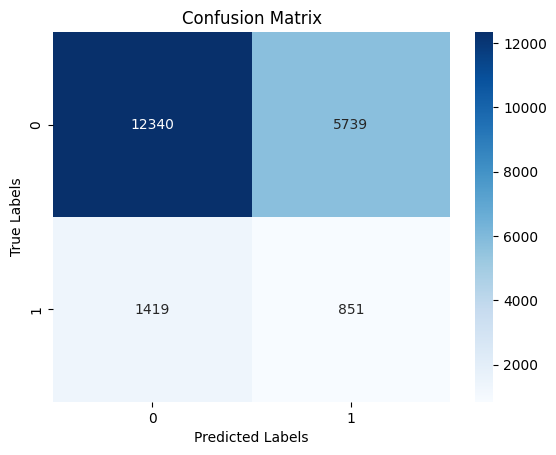

In [129]:
lda_cm_1 = confusion_matrix(y_test, pred_lda)

sns.heatmap(lda_cm_1, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [130]:
# 10 most significantfeatures
lda_coef_1 = lda_after.coef_
feature_names = x.columns
significant_features = sorted(zip(feature_names, lda_coef_1[0]), key=lambda x: abs(x[1]), reverse=True)[:10]
for feature, coef in significant_features:
    print(f"{feature}: {coef}")

num_unique_diag_groups: -0.3236157138058652
metformin: -0.29880851574273176
num_procedures: -0.2667995643741087
glipizide: -0.25096623788217753
glyburide: -0.24491212565434076
number_inpatient: 0.2306424086296685
pioglitazone: -0.20381846708886686
glimepiride: -0.18507808511808807
glycemic_risk_score: -0.18243607673885387
rosiglitazone: -0.17626072326585998


In [131]:
# Logestic Regression

lr_after = LogisticRegression(max_iter=1000, solver = 'lbfgs', class_weight='balanced')

lr_after.fit(X_train,Y_train)

pred_lr_1 = lr_after.predict(x_test_le)
y_prob = lr_after.predict_proba(x_test_le)[:, 1]

lr_train_acc_1 = lr_after.score(X_train, Y_train)
lr_test_acc_1 = lr_after.score(x_test_le, y_test)
lr_f1_1 = f1_score(y_test, pred_lr, average='weighted')
lr_auc_1 = roc_auc_score(y_test, y_prob)

print("Logistic Regression Training Accuracy:", lr_train_acc_1)
print("Logistic Regression Test Accuracy:", lr_test_acc_1)
print("Logistic Regression F1 Score:", lr_f1_1)
print("Logistic Regression AUC:", lr_auc_1)
print("Logistic Regression Classification Report:\n", classification_report(y_test, pred_lr))

Logistic Regression Training Accuracy: 0.7453190253616174
Logistic Regression Test Accuracy: 0.673890608875129
Logistic Regression F1 Score: 0.7042391917545916
Logistic Regression AUC: 0.5449623812084652
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.67      0.77     18079
           1       0.14      0.43      0.21      2270

    accuracy                           0.64     20349
   macro avg       0.52      0.55      0.49     20349
weighted avg       0.82      0.64      0.70     20349



In [132]:
lr_coef_1 = lr_after.coef_
feature_names = x.columns
significant_features = sorted(zip(feature_names, lr_coef_1[0]), key=lambda x: abs(x[1]), reverse=True)[:10]
for feature, coef in significant_features:
    print(f"{feature}: {coef}")

metformin: -0.43079226494918316
glipizide: -0.35199851251639924
glyburide: -0.3446925090841658
num_unique_diag_groups: -0.3077139389113179
pioglitazone: -0.3016896346650145
num_procedures: -0.27487025194585923
glimepiride: -0.27130248643528365
rosiglitazone: -0.26885755369826353
on_multiple_drugs: 0.24810933069394914
insulin: -0.23332728250060802


Text(50.722222222222214, 0.5, 'True Labels')

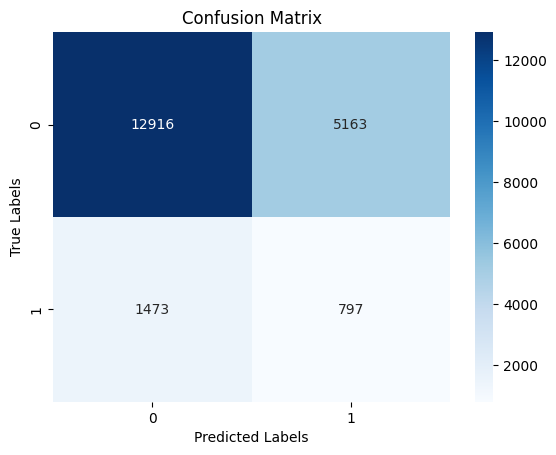

In [133]:
lr_cm_1 = confusion_matrix(y_test, pred_lr_1)

sns.heatmap(lr_cm_1, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

In [134]:
# Descion Tree

dt_1 = DecisionTreeClassifier(criterion='gini', max_depth=30, max_features=None)

dt_1.fit(X_train,Y_train)

pred_dt_1 = dt_1.predict(x_test_le)

dt_train_acc_1 = dt_1.score(X_train, Y_train)
dt_test_acc_1 = dt_1.score(x_test_le, y_test)

print("Decision Tree Training Accuracy:", dt_train_acc_1)
print("Decision Tree Test Accuracy:", dt_test_acc_1)
print("Decision Tree F1 Score:", f1_score(y_test, pred_dt, average='weighted'))
print("Decision Tree Classification Report:\n", classification_report(y_test, pred_dt))

Decision Tree Training Accuracy: 0.9823547307575297
Decision Tree Test Accuracy: 0.7196422428620571
Decision Tree F1 Score: 0.7424436545522707
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.74      0.81     18079
           1       0.14      0.32      0.19      2270

    accuracy                           0.69     20349
   macro avg       0.52      0.53      0.50     20349
weighted avg       0.81      0.69      0.74     20349



Text(50.722222222222214, 0.5, 'True Labels')

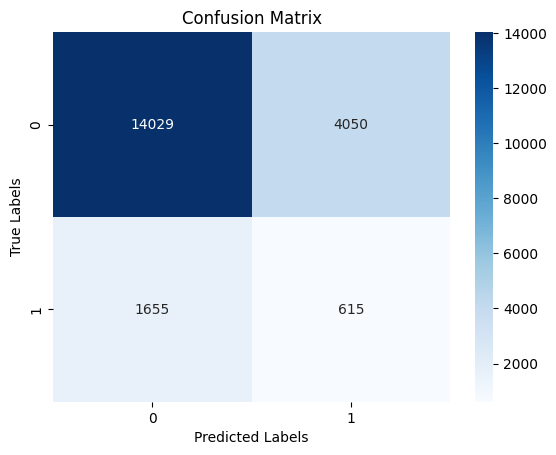

In [135]:
dt_cm_1 = confusion_matrix(y_test, pred_dt_1)

sns.heatmap(dt_cm_1, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

In [136]:
rf_1 = RandomForestClassifier(n_estimators=100, random_state=42)

rf_1.fit(X_train, Y_train)

pred_rf_1 = rf_1.predict(x_test_le)

rf_train_acc_1 = rf_1.score(X_train, Y_train)
rf_test_acc_1 = rf_1.score(x_test_le, y_test)
rf_f1_1 = f1_score(y_test, pred_rf_1, average='weighted')
rf_auc_1 = roc_auc_score(y_test, pred_rf_1)

print("Random Forest Training Accuracy:", round(rf_train_acc_1, 4))
print("Random Forest Test Accuracy:", round(rf_test_acc_1, 4))
print("Random Forest F1 Score:", round(rf_f1_1, 4))
print("Random Forest AUC:", round(rf_auc_1, 4))

print("Classification Report:\n", classification_report(y_test, pred_rf_1))

Random Forest Training Accuracy: 1.0
Random Forest Test Accuracy: 0.8361
Random Forest F1 Score: 0.8217
Random Forest AUC: 0.515
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91     18079
           1       0.15      0.10      0.12      2270

    accuracy                           0.84     20349
   macro avg       0.52      0.52      0.52     20349
weighted avg       0.81      0.84      0.82     20349



Text(50.722222222222214, 0.5, 'True Labels')

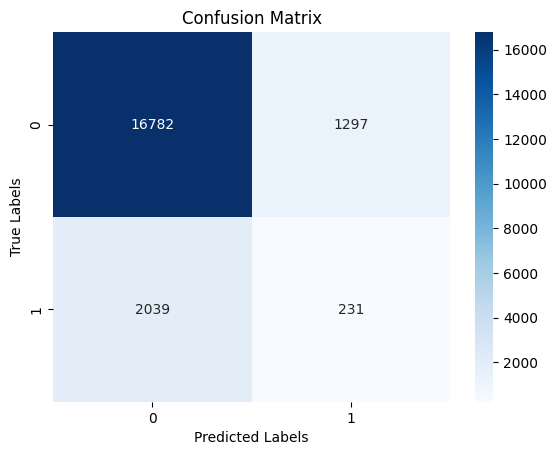

In [137]:
rf_cm_1 = confusion_matrix(y_test, pred_rf_1)

sns.heatmap(rf_cm_1, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')


In [138]:
ct_1 = CatBoostClassifier(
    iterations=500,
    learning_rate=0.03,
    depth=8,
    l2_leaf_reg=5,
    bagging_temperature=0.5,
    loss_function='Logloss',
    random_seed=42,
    verbose=100
    )

ct_1.fit(X_train,Y_train)

pred_ct_1 = ct_1.predict(x_test_le)

ct_train_acc_1 = ct_1.score(X_train, Y_train)
ct_test_acc_1 = ct_1.score(x_test_le, y_test)

print("Catboost Training Accuracy:", ct_train_acc_1)
print("Catboost Test Accuracy:", ct_test_acc_1)
print("Catboost F1 Score:", f1_score(y_test, pred_ct_1, average='weighted'))
print("Catboost Classification Report:\n", classification_report(y_test, pred_ct_1))

0:	learn: 0.6852962	total: 71.8ms	remaining: 35.8s
100:	learn: 0.3845371	total: 6.32s	remaining: 25s
200:	learn: 0.3290138	total: 14.6s	remaining: 21.7s
300:	learn: 0.3027044	total: 20.5s	remaining: 13.6s
400:	learn: 0.2848982	total: 28.7s	remaining: 7.08s
499:	learn: 0.2639760	total: 34.7s	remaining: 0us
Catboost Training Accuracy: 0.9111306247752856
Catboost Test Accuracy: 0.8711976018477566
Catboost F1 Score: 0.8376711872594701
Catboost Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93     18079
           1       0.22      0.06      0.10      2270

    accuracy                           0.87     20349
   macro avg       0.56      0.52      0.51     20349
weighted avg       0.82      0.87      0.84     20349



Text(50.722222222222214, 0.5, 'True Labels')

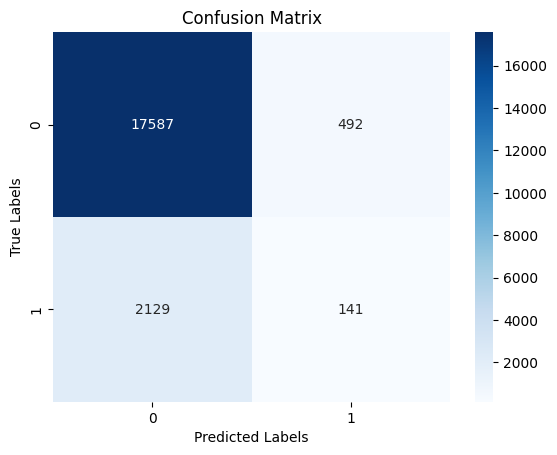

In [139]:
cat_cm_1 = confusion_matrix(y_test, pred_ct_1)

sns.heatmap(cat_cm_1, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

In [140]:
# Xgboost

xb_1 = xgb.XGBClassifier(
    objective='binary:logistic',
    learning_rate=0.03,
    n_estimators=1000,
    max_depth=6,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    reg_lambda=1.2,
    reg_alpha=0.3,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

xb_1.fit(X_train,Y_train)

pred_xb_1 = xb_1.predict(x_test_le)

xb_train_acc_1 = xb_1.score(X_train, Y_train)
xb_test_acc_1 = xb_1.score(x_test_le, y_test)
xb_probs_1 = xb_1.predict_proba(x_test_le)[:, 1]

print("Xgboost Training Accuracy:", xb_train_acc_1)
print("Xgboost Test Accuracy:", xb_test_acc_1)
print("Xgboost F1 Score:", f1_score(y_test, pred_xb_1, average='weighted'))
print("Xgboost AUC:", roc_auc_score(y_test, xb_probs_1))
print("Xgboost Classification Report:\n", classification_report(y_test, pred_xb_1))

Xgboost Training Accuracy: 0.9156387421522804
Xgboost Test Accuracy: 0.8667256376234704
Xgboost F1 Score: 0.836561783942955
Xgboost AUC: 0.6112686293855187
Xgboost Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93     18079
           1       0.21      0.07      0.11      2270

    accuracy                           0.87     20349
   macro avg       0.55      0.52      0.52     20349
weighted avg       0.82      0.87      0.84     20349



Text(0.5, 1.0, 'Confusion Matrix')

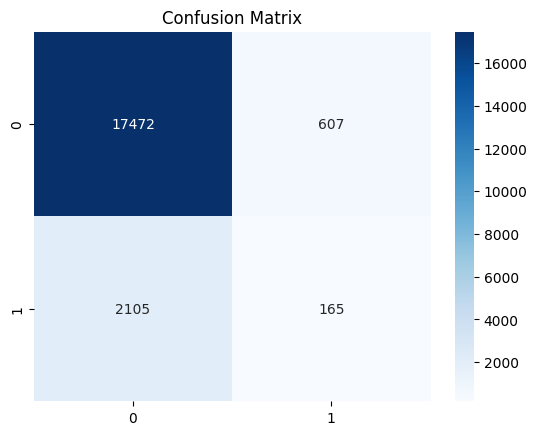

In [141]:
xb_cm_1 = confusion_matrix(y_test, pred_xb_1)

sns.heatmap(xb_cm_1, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')

In [142]:
xg_fi_1 = xb.feature_importances_
feature_names = x.columns
significant_features = sorted(zip(feature_names, xg_fi_1), key=lambda x: abs(x[1]), reverse=True)[:10]
for feature, coef in significant_features:
    print(f"{feature}: {coef}")

metformin: 0.06132273003458977
medical_specialty: 0.05789349973201752
Treatment_intensity: 0.05577056109905243
admission_source_id: 0.055353794246912
glimepiride: 0.052791666239500046
pioglitazone: 0.05275464802980423
glyburide: 0.049113012850284576
rosiglitazone: 0.042695291340351105
glipizide: 0.042321957647800446
discharge_disposition_id: 0.03671478480100632


In [143]:
lr_coef_1 = lr_after.coef_
feature_names = x.columns
significant_features = sorted(zip(feature_names, lr_coef_1[0]), key=lambda x: abs(x[1]), reverse=True)[:10]
for feature, coef in significant_features:
    print(f"{feature}: {coef}")

metformin: -0.43079226494918316
glipizide: -0.35199851251639924
glyburide: -0.3446925090841658
num_unique_diag_groups: -0.3077139389113179
pioglitazone: -0.3016896346650145
num_procedures: -0.27487025194585923
glimepiride: -0.27130248643528365
rosiglitazone: -0.26885755369826353
on_multiple_drugs: 0.24810933069394914
insulin: -0.23332728250060802


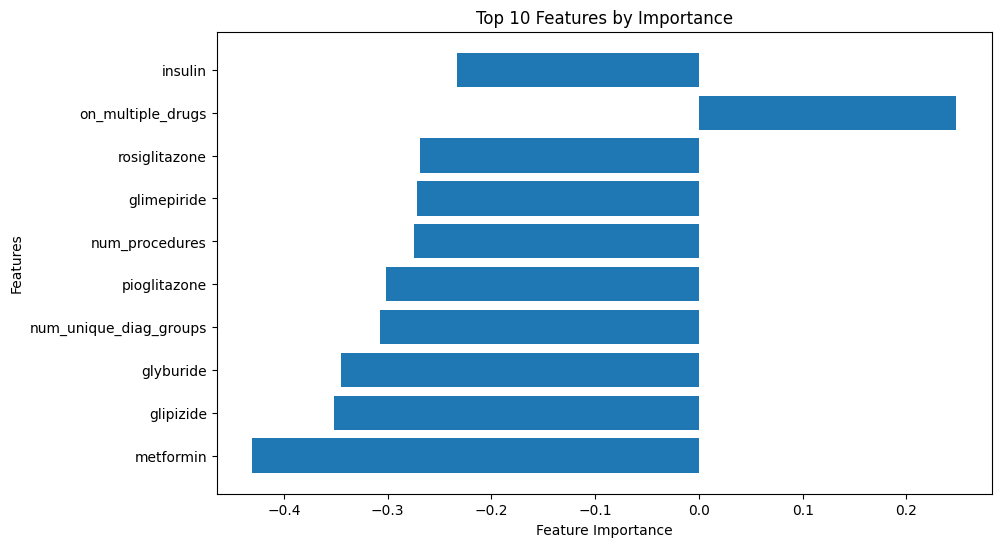

In [144]:
#feature importance bar graph top 10
plt.figure(figsize=(10, 6))
plt.barh(range(len(significant_features)), [coef for feature, coef in significant_features], align='center')
plt.yticks(range(len(significant_features)), [feature for feature, coef in significant_features])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Features by Importance')
plt.show()

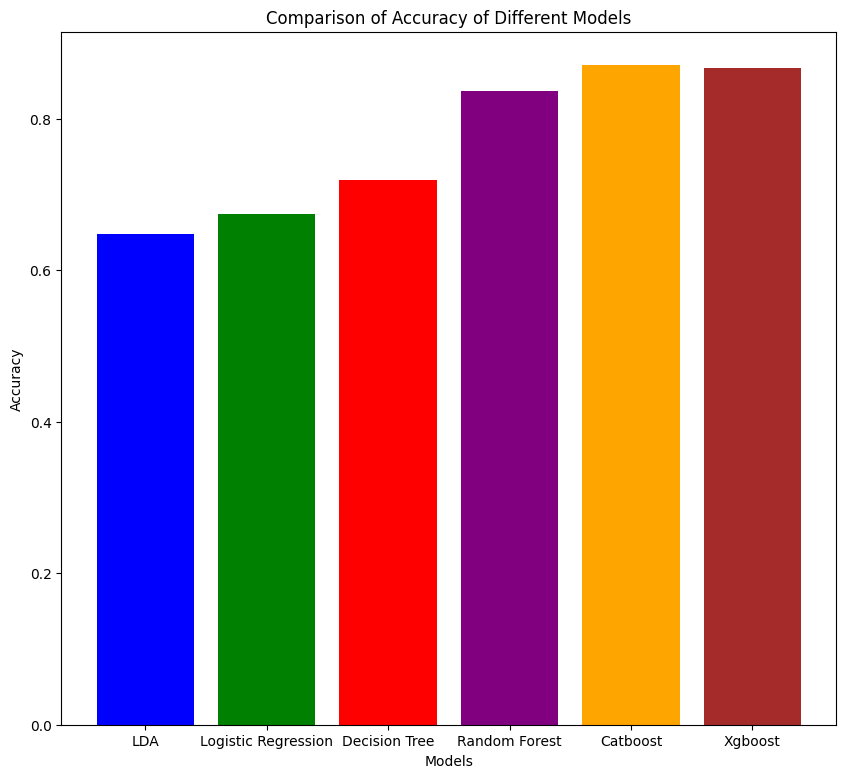

In [145]:
plt.figure(figsize=(10, 9))
plt.bar(x=['LDA', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'Catboost', 'Xgboost'],
        height=[lda_test_acc_1, lr_test_acc_1, dt_test_acc_1, rf_test_acc_1, ct_test_acc_1, xb_test_acc_1],
        color=['blue', 'green', 'red', 'purple', 'orange', 'brown'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy of Different Models')
plt.show()

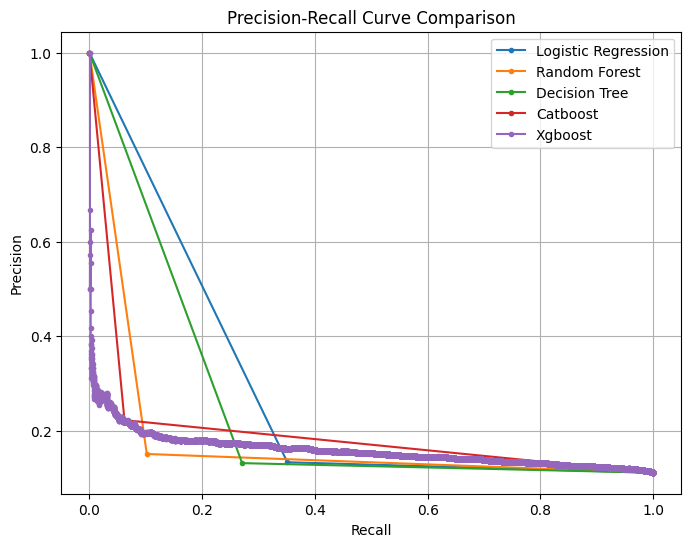

In [146]:
from sklearn.metrics import precision_recall_curve


# Logistic Regression predictions
precision_lr, recall_lr, _ = precision_recall_curve(y_test, pred_lr_1)

# Decision Tree predictions
precision_dt, recall_dt, _ = precision_recall_curve(y_test, pred_dt_1)

# Random Forest predictions
precision_rf, recall_rf, _ = precision_recall_curve(y_test, pred_rf_1)

# Xg Boost
precision_xb, recall_xb, _ = precision_recall_curve(y_test, xb_probs_1)

# Catboost
precision_ct, recall_ct, _ = precision_recall_curve(y_test, pred_ct_1)

# Plot both curves
plt.figure(figsize=(8,6))
plt.plot(recall_lr, precision_lr, marker='.', label='Logistic Regression')
plt.plot(recall_rf, precision_rf, marker='.', label='Random Forest')
plt.plot(recall_dt, precision_dt, marker='.', label='Decision Tree')
plt.plot(recall_ct, precision_ct, marker='.', label='Catboost')
plt.plot(recall_xb, precision_xb, marker='.', label='Xgboost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.grid()
plt.legend()
plt.show()

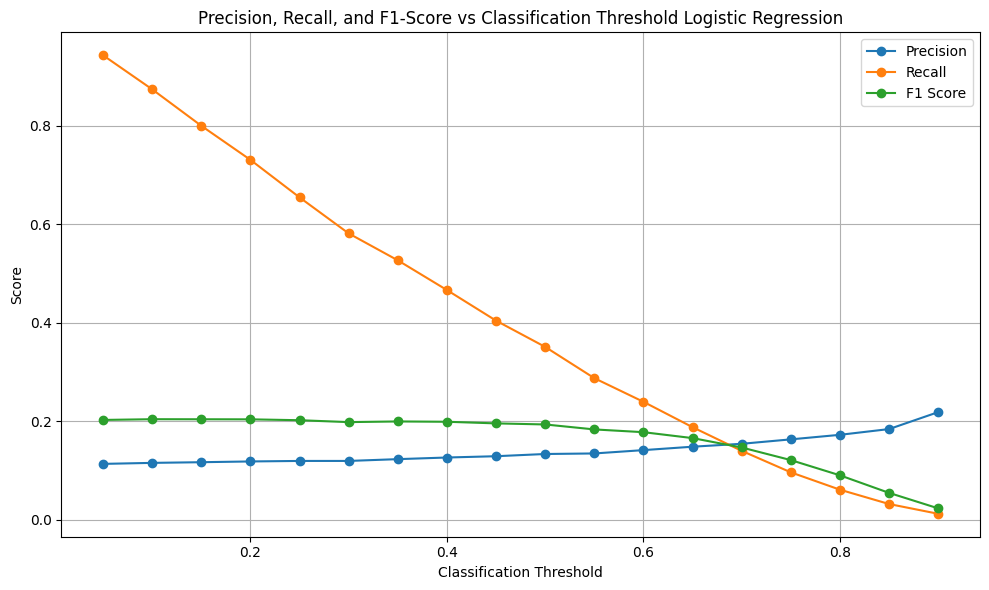

In [147]:
from sklearn.metrics import precision_recall_fscore_support

# Get predicted probabilities
lr_proba = lr_after.predict_proba(x_test_le)[:, 1]

# Define thresholds
thresholds = np.arange(0.05, 0.95, 0.05)
precision_scores = []
recall_scores = []
f1_scores = []

# Calculate scores at each threshold
for threshold in thresholds:
    preds = (lr_proba >= threshold).astype(int)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_test, preds, average='binary', zero_division=0
    )
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores, label='Precision', marker='o')
plt.plot(thresholds, recall_scores, label='Recall', marker='o')
plt.plot(thresholds, f1_scores, label='F1 Score', marker='o')

plt.title('Precision, Recall, and F1-Score vs Classification Threshold Logistic Regression')
plt.xlabel('Classification Threshold')
plt.ylabel('Score')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



# Risk Scoring

In [148]:
def calculate_risk_score(p):
  if p >= 0.6:
    return "High Risk"
  elif p >= 0.3:
    return "Medium Risk"
  else:
    return "Low Risk"

probs = lr_after.predict_proba(x_test_le)[:, 1]
risk_scores = [calculate_risk_score(p) for p in probs]

risk_score_df = pd.DataFrame({
    'Probability': probs,
    'Risk Score': risk_scores
})

display(risk_score_df)

Probability   Risk Score
0         0.222415     Low Risk
1         0.380105  Medium Risk
2         0.003149     Low Risk
3         0.479199  Medium Risk
4         0.411391  Medium Risk
...            ...          ...
20344     0.030280     Low Risk
20345     0.829956    High Risk
20346     0.092792     Low Risk
20347     0.459008  Medium Risk
20348     0.497938  Medium Risk

[20349 rows x 2 columns]

In [149]:
# Merge risk_score_df with df2 on the index to get encounter_id
risk_score_df = risk_score_df.merge(df5[['encounter_id']], left_index=True, right_index=True)

# Reorder columns to have encounter_id first
risk_score_df = risk_score_df[['encounter_id'] + [col for col in risk_score_df.columns if col != 'encounter_id']]

display(risk_score_df.head())

encounter_id  Probability   Risk Score
0         12522     0.222415     Low Risk
1         15738     0.380105  Medium Risk
2         16680     0.003149     Low Risk
3         28236     0.479199  Medium Risk
4         35754     0.411391  Medium Risk

In [150]:
risk_score_df = risk_score_df.merge(df5[['medical_specialty']], left_index=True, right_index=True)
risk_score_df = risk_score_df.merge(df4[['week_num']], left_index=True, right_index=True)

# Reorder columns to have medical_specialty after encounter_id
cols = risk_score_df.columns.tolist()
cols.insert(cols.index('encounter_id') + 1, cols.pop(cols.index('medical_specialty')))
risk_score_df = risk_score_df[cols]

display(risk_score_df.head())

encounter_id medical_specialty  Probability   Risk Score  week_num
0         12522           Unknown     0.222415     Low Risk         0
1         15738  InternalMedicine     0.380105  Medium Risk         0
2         16680           Unknown     0.003149     Low Risk         0
3         28236           Unknown     0.479199  Medium Risk         0
4         35754           Unknown     0.411391  Medium Risk         0

In [151]:
risk_score_df

encounter_id   medical_specialty  Probability   Risk Score  week_num
0             12522             Unknown     0.222415     Low Risk         0
1             15738    InternalMedicine     0.380105  Medium Risk         0
2             16680             Unknown     0.003149     Low Risk         0
3             28236             Unknown     0.479199  Medium Risk         0
4             35754             Unknown     0.411391  Medium Risk         0
...             ...                 ...          ...          ...       ...
20344      71769702    InternalMedicine     0.030280     Low Risk      2035
20345      71731212             Surgery     0.829956    High Risk      2035
20346      71726868  SpecialistMedicine     0.092792     Low Risk      2035
20347      71715132             Surgery     0.459008  Medium Risk      2034
20348      71714622          Cardiology     0.497938  Medium Risk      2034

[20349 rows x 5 columns]

In [152]:
follow_up_plan = {
    "Low Risk": {"days": "14–30 days", "method": "Automated SMS/Email", "responsible": "Automated system"},
    "Medium Risk": {"days": "7–14 days", "method": "Nurse call / Teleconsult", "responsible": "Nurse"},
    "High Risk": {"days": "2–5 days", "method": "Doctor call / Home visit", "responsible": "Doctor"}
}

risk_score_df["follow_up_days"] = risk_score_df["Risk Score"].map(lambda x: follow_up_plan[x]["days"])
risk_score_df["follow_up_method"] = risk_score_df["Risk Score"].map(lambda x: follow_up_plan[x]["method"])
risk_score_df["assigned_to"] = risk_score_df["Risk Score"].map(lambda x: follow_up_plan[x]["responsible"])

risk_score_df

encounter_id   medical_specialty  Probability   Risk Score  week_num  \
0             12522             Unknown     0.222415     Low Risk         0   
1             15738    InternalMedicine     0.380105  Medium Risk         0   
2             16680             Unknown     0.003149     Low Risk         0   
3             28236             Unknown     0.479199  Medium Risk         0   
4             35754             Unknown     0.411391  Medium Risk         0   
...             ...                 ...          ...          ...       ...   
20344      71769702    InternalMedicine     0.030280     Low Risk      2035   
20345      71731212             Surgery     0.829956    High Risk      2035   
20346      71726868  SpecialistMedicine     0.092792     Low Risk      2035   
20347      71715132             Surgery     0.459008  Medium Risk      2034   
20348      71714622          Cardiology     0.497938  Medium Risk      2034   

      follow_up_days          follow_up_method       assigned_to  
0         14–30 days       Automated SMS/Email  Automated system  
1          7–14 days  Nurse call / Teleconsult             Nurse  
2         14–30 days       Automated SMS/Email  Automated system  
3          7–14 days  Nurse call / Teleconsult             Nurse  
4          7–14 days  Nurse call / Teleconsult             Nurse  
...              ...                       ...               ...  
20344     14–30 days       Automated SMS/Email  Automated system  
20345       2–5 days  Doctor call / Home visit            Doctor  
20346     14–30 days       Automated SMS/Email  Automated system  
20347      7–14 days  Nurse call / Teleconsult             Nurse  
20348      7–14 days  Nurse call / Teleconsult             Nurse  

[20349 rows x 8 columns]

In [153]:
# Ensure encounter_id is the same dtype
df4['encounter_id'] = df4['encounter_id'].astype(int)
risk_score_df['encounter_id'] = risk_score_df['encounter_id'].astype(int)

# Merge discharge_date into risk_score_df
risk_score_df = risk_score_df.merge(
    df4[['encounter_id', 'discharge_date']],
    on='encounter_id',
    how='left'
)

print("Merged Successfully!")
risk_score_df.head()

Merged Successfully!


encounter_id medical_specialty  Probability   Risk Score  week_num  \
0         12522           Unknown     0.222415     Low Risk         0   
1         15738  InternalMedicine     0.380105  Medium Risk         0   
2         16680           Unknown     0.003149     Low Risk         0   
3         28236           Unknown     0.479199  Medium Risk         0   
4         35754           Unknown     0.411391  Medium Risk         0   

  follow_up_days          follow_up_method       assigned_to discharge_date  
0     14–30 days       Automated SMS/Email  Automated system     1999-01-01  
1      7–14 days  Nurse call / Teleconsult             Nurse     1999-01-01  
2     14–30 days       Automated SMS/Email  Automated system     1999-01-01  
3      7–14 days  Nurse call / Teleconsult             Nurse     1999-01-01  
4      7–14 days  Nurse call / Teleconsult             Nurse     1999-01-01

In [154]:
# Function to compute communication date
def compute_comm_date(row):
    if pd.isna(row['discharge_date']):
        return None

    if row['Risk Score'] == "High Risk":
        return row['discharge_date'] + pd.Timedelta(days=3)
    elif row['Risk Score'] == "Medium Risk":
        return row['discharge_date'] + pd.Timedelta(days=15)
    else:  # Low Risk
        return row['discharge_date'] + pd.Timedelta(days=30)

# Apply it
risk_score_df['communication_date'] = risk_score_df.apply(compute_comm_date, axis=1)

print("Communication dates added successfully!")
risk_score_df.head()

Communication dates added successfully!


encounter_id medical_specialty  Probability   Risk Score  week_num  \
0         12522           Unknown     0.222415     Low Risk         0   
1         15738  InternalMedicine     0.380105  Medium Risk         0   
2         16680           Unknown     0.003149     Low Risk         0   
3         28236           Unknown     0.479199  Medium Risk         0   
4         35754           Unknown     0.411391  Medium Risk         0   

  follow_up_days          follow_up_method       assigned_to discharge_date  \
0     14–30 days       Automated SMS/Email  Automated system     1999-01-01   
1      7–14 days  Nurse call / Teleconsult             Nurse     1999-01-01   
2     14–30 days       Automated SMS/Email  Automated system     1999-01-01   
3      7–14 days  Nurse call / Teleconsult             Nurse     1999-01-01   
4      7–14 days  Nurse call / Teleconsult             Nurse     1999-01-01   

  communication_date  
0         1999-01-31  
1         1999-01-16  
2         1999-01-31  
3         1999-01-16  
4         1999-01-16

In [155]:
# Add week number of communication_date
risk_score_df['week'] = risk_score_df['communication_date'].dt.isocalendar().week
risk_score_df['year'] = risk_score_df['communication_date'].dt.year
risk_score_df['month'] = risk_score_df['communication_date'].dt.month

In [156]:
risk_score_df.head()

encounter_id medical_specialty  Probability   Risk Score  week_num  \
0         12522           Unknown     0.222415     Low Risk         0   
1         15738  InternalMedicine     0.380105  Medium Risk         0   
2         16680           Unknown     0.003149     Low Risk         0   
3         28236           Unknown     0.479199  Medium Risk         0   
4         35754           Unknown     0.411391  Medium Risk         0   

  follow_up_days          follow_up_method       assigned_to discharge_date  \
0     14–30 days       Automated SMS/Email  Automated system     1999-01-01   
1      7–14 days  Nurse call / Teleconsult             Nurse     1999-01-01   
2     14–30 days       Automated SMS/Email  Automated system     1999-01-01   
3      7–14 days  Nurse call / Teleconsult             Nurse     1999-01-01   
4      7–14 days  Nurse call / Teleconsult             Nurse     1999-01-01   

  communication_date  week  year  month  
0         1999-01-31     4  1999      1  
1         1999-01-16     2  1999      1  
2         1999-01-31     4  1999      1  
3         1999-01-16     2  1999      1  
4         1999-01-16     2  1999      1

In [157]:
import pandas as pd
import plotly.express as px

# Ensure week_num is numeric
risk_score_df['week_num'] = risk_score_df['week_num'].astype(int)

# Add readable week label
risk_score_df['week_label'] = risk_score_df['week_num'].apply(lambda x: f'Week {x}')

# ---- STEP 1: Aggregate counts per week and staff type ----
weekly_counts = (
    risk_score_df
    .groupby(['week_label', 'assigned_to', 'medical_specialty'])
    .size()
    .reset_index(name='Count')
)

# ---- FIXED SORT ----
weekly_counts = weekly_counts.sort_values(
    by='week_label',
    key=lambda col: col.str.extract(r'(\d+)')[0].astype(int)
)

# ---- STEP 2: Plot ----
fig = px.bar(
    weekly_counts,
    x='week_label',
    y='Count',
    color='assigned_to',
    text='Count',
    hover_data=['medical_specialty'],
    color_discrete_map={
        'Doctor': '#2ca02c',
        'Nurse': '#ff7f0e',
        'Automated system': '#1f77b4'
    },
    title='Weekly Staffing Requirement by Department and Staff Type',
    barmode='stack'
)

fig.update_traces(textposition='inside')
fig.update_layout(
    xaxis_title='Week (Chronological)',
    yaxis_title='Number of Staff Tasks',
    template='plotly_dark',
    title_x=0.5,
    bargap=0.15,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    legend_title='Assigned To'
)

fig.show()


# LLM Integration

In [160]:
!pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 kB 2.9 MB/s eta 0:00:00


In [163]:
df6 = df4.copy()

In [ ]:
!pip install gradio sentence-transformers faiss-cpu --quiet


import os, textwrap, json
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
import faiss
from groq import Groq
import gradio as gr

GROQ_API_KEY = "#"
LLM_MODEL = "qwen/qwen3-32b"
TOP_K_SNIPPETS = 4

client = Groq(api_key=GROQ_API_KEY)

def llm_complete(prompt):
    try:
        r = client.chat.completions.create(
            model=LLM_MODEL,
            messages=[{"role": "user", "content": prompt}],
            temperature=0.35,
            max_tokens=250
        )
        return r.choices[0].message.content.strip()
    except Exception as e:
        return f"[LLM ERROR: {e}]"


# KNOWLEDGE BASE for RAG
kb_rules = [
    "Patients discharged against medical advice have elevated 30-day readmission risk.",
    "High glycemic risk, frequent inpatient visits, and endocrine disorders increase readmission likelihood.",
    "Poor weather, public holidays, and high air pollution reduce follow-up adherence.",
    "Extreme temperature changes worsen respiratory or cardiovascular conditions.",
    "Low risk → automated SMS in 14–30 days.",
    "Medium risk → nurse tele-follow-up in 3–7 days.",
    "High risk → doctor teleconsult or home visit within 2–5 days is recommended."
]

embedder = SentenceTransformer("all-MiniLM-L6-v2")
kb_emb = embedder.encode(kb_rules, normalize_embeddings=True).astype("float32")
index = faiss.IndexFlatL2(kb_emb.shape[1])
index.add(kb_emb)

def retrieve_context(query, k=TOP_K_SNIPPETS):
    emb = embedder.encode([query], normalize_embeddings=True).astype("float32")
    _, idx = index.search(emb, k)
    return [kb_rules[i] for i in idx[0]]


def safe_round(v):
    return round(float(v), 3) if isinstance(v, (float, int, np.floating)) else str(v)

def to_python_type(v):
    return v.item() if isinstance(v, np.generic) else v

def preprocess_input(row, feature_order):
    X = row.reindex(feature_order, fill_value=np.nan).to_frame().T
    for col in X.columns:
        if X[col].dtype == "object":
            X[col] = X[col].astype("category").cat.codes
    return X



# LLM PROMPT

def build_prompt(row, top_feats, pred_label, pred_prob, externals, ctx):

    f_block = "\n".join([f"- {f}: {safe_round(row[f])}" for f in top_feats[:8]])
    c_block = "\n- " + "\n- ".join(ctx)

    return f"""
You are an empathetic clinical reasoning assistant.
Explain the patient's readmission risk in a clear, supportive, human-centered tone.

--- Clinical Signals ---
{f_block}

--- Contextual Insights ---
{c_block}

Prediction: {"Readmitted" if pred_label else "Not Readmitted"}
Confidence: {pred_prob:.4f}

Write 3–4 compassionate sentences describing:
1. The main medical drivers affecting the risk.
2. How weather / pollution / holidays realistically influence their recovery.
3. A gentle, practical suggestion for follow-up care that supports the patient's well-being.

Avoid robotic or statistical language.
""".strip()


# Main function
def explain_patient_graphically(encounter_id):

    encounter_id = int(encounter_id)

    # patient row
    row_q = df6[df6["encounter_id"] == encounter_id]
    if row_q.empty:
        return "<h3 style='color:red;'>❌ Encounter ID not found.</h3>"

    row = row_q.iloc[0]

    # prediction
    X_input = preprocess_input(row, xb_1.feature_names_in_)
    pred_prob = float(xb_1.predict_proba(X_input)[0, 1])
    pred_label = int(pred_prob >= 0.5)

    # follow-up
    rs = risk_score_df[risk_score_df["encounter_id"] == encounter_id]
    if not rs.empty:
        r = rs.iloc[0]
        clean_days = str(r["follow_up_days"]).replace("days days", "days")
        follow = f"{r['follow_up_method']} in {clean_days} — Assigned to {r['assigned_to']}"
    else:
        follow = "N/A"

    # RAG
    externals = {c: to_python_type(row[c]) for c in ["tavg","pm25","holiday_flag","prcp"] if c in row}
    ctx = retrieve_context("environmental")

    # top features
    feat_importances = sorted(zip(x.columns, xb_1.feature_importances_), key=lambda x: -x[1])
    top_feats = [f for f, _ in feat_importances]

    explanation = llm_complete(build_prompt(row, top_feats, pred_label, pred_prob, externals, ctx))

    color = "#e63946" if pred_label else "#2a9d8f"
    icon = "⚠️" if pred_label else "✅"
    status = "High Risk" if pred_label else "Low Risk"

    return f"""
    <div style="background:#0d1b2a; padding:20px; border-radius:15px; border:2px solid {color};
                color:#e0fbfc; font-family:Arial;">
        <h2 style="color:{color};">{icon} Prediction: {status}</h2>
        <p><b>Confidence:</b> {pred_prob:.3f}</p>
        <p><b>Follow-Up Plan:</b> {follow}</p>

        <hr style="border-color:{color}; margin:20px 0;">

        <h3>🧠 AI Clinical Reasoning</h3>
        <p style="white-space:pre-wrap; line-height:1.6;">{explanation}</p>
    </div>
    """



# PATIENT TABLE
def show_patient_table(encounter_id):
    df = df6[df6["encounter_id"] == int(encounter_id)]
    return df.to_html(index=False) if not df.empty else "<h3 style='color:red;'>Not found.</h3>"



# DOCTOR SCHEDULE
def generate_doctor_schedule(year, month):

    df = risk_score_df.copy()
    df = df[(df["year"] == int(year)) & (df["month"] == int(month))]

    if df.empty:
        return "<h3>No follow-ups this month.</h3>"

    df = df.sort_values("communication_date")

    html = "<h2 style='color:#2a9d8f;'>📅 Monthly Follow-up Schedule</h2>"
    for wk in sorted(df["week"].unique()):
        subset = df[df["week"] == wk][[
            "encounter_id","Risk Score","medical_specialty",
            "follow_up_method","assigned_to","communication_date"
        ]]
        html += f"<h3>Week {wk}</h3>" + subset.to_html(index=False)

    return html


prediction_tab = gr.Interface(
    fn=explain_patient_graphically,
    inputs=gr.Number(label="Encounter ID"),
    outputs=gr.HTML(),
    title="Prediction Report"
)

patient_table_tab = gr.Interface(
    fn=show_patient_table,
    inputs=gr.Number(label="Encounter ID"),
    outputs=gr.HTML(),
    title="Patient Record"
)

schedule_tab = gr.Interface(
    fn=generate_doctor_schedule,
    inputs=[gr.Number(label="Year", value=2025),
            gr.Dropdown(label="Month", choices=list(range(1,13)), value=1)],
    outputs=gr.HTML(),
    title="Doctor Schedule"
)

demo = gr.TabbedInterface(
    [prediction_tab, patient_table_tab, schedule_tab],
    ["Prediction", "Patient Details", "Doctor Schedule"]
)


In [165]:
demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4c2c96e71a10cece74.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
